# 1. Sample Dataset

To access files stored in your Google Drive from a Google Colab notebook, you need to mount your Google Drive. The following code mounts your Google Drive to the Colab environment, allowing you to read and write files directly from your Drive.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This code extracts the contents of a ZIP file stored in your Google Drive to a specified directory in the Colab environment. The script first ensures that the destination directory exists and then unzips the file into that directory.

- `file_path`: this is the file path that contain your zipped dataset
- `destination_path`: this is the file destination to save the unzipped dataset


In [2]:
import zipfile
import os

file_path = '/content/drive/MyDrive/HistopatologyBreastCancerM400X_unhas_makassar.zip'
destination_path = '/content/HistopatologyBreastCancerM400X_unhas_makassar.zip'

# Create the destination directory if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_path)

print(f"Unzipped file to {destination_path}")

Unzipped file to /content/HistopatologyBreastCancerM400X_unhas_makassar.zip


## 1.1 Creating Validation Set

This code defines a function called `count_class` that counts the number of images in two different directories, representing two classes of data (e.g., benign and malignant images).

### Inputs:
- `path1`: The file path to the directory containing images for the first class (e.g., benign).
- `path2`: The file path to the directory containing images for the second class (e.g., malignant).

### Functionality:
The function calculates the number of files in each directory and prints out the count for each class as well as the total number of images in both directories combined.

The function is then called with specific paths (`path_1` and `path_2`), which point to directories within the unzipped dataset containing images of benign and malignant tumors, respectively.


In [3]:
def count_class(path1, path2):
  training_data_negative = path1
  training_data_positive = path2
  len_negative = len(os.listdir(training_data_negative))
  len_positive = len(os.listdir(training_data_positive))
  print(f'Class 1: {len_negative}')
  print(f'Class 2: {len_positive}')
  print(f'Total: {len_negative+len_positive}')

path_1 = '/content/HistopatologyBreastCancerM400X_unhas_makassar.zip/HistopatologyBreastCancerM400X/train/benign'
path_2 = '/content/HistopatologyBreastCancerM400X_unhas_makassar.zip/HistopatologyBreastCancerM400X/train/malignant'
count_class(path_1, path_2)

Class 1: 371
Class 2: 777
Total: 1148


This code defines a function called `create_validation_split` that creates a validation dataset by splitting off a portion of the images from the training dataset. The selected validation images are moved to a separate directory.

### Inputs:
- `train_data_dir`: The directory containing the training data, where each class has its own subdirectory.
- `validation_data_dir`: The directory where the validation data will be stored, with the same class subdirectory structure as the training data.
- `validation_split`: The proportion of the training data to move to the validation set (default is 20%).
- `seed`: A random seed to ensure reproducibility of the split (default is 123).

### Functionality:
The function:
1. Ensures the validation directory exists.
2. Iterates through each class subdirectory in the training data directory.
3. Splits the images in each class into training and validation sets based on the specified split ratio.
4. Moves the selected validation images from the training directory to the corresponding class subdirectory in the validation directory.

After running this function, the validation set will be separated from the training set, which is useful for model evaluation.


In [4]:
import os
import shutil
from sklearn.model_selection import train_test_split

def create_validation_split(train_data_dir, validation_data_dir, validation_split=0.2, seed=123):
    # Ensure the validation directory exists
    if not os.path.exists(validation_data_dir):
        os.makedirs(validation_data_dir)

    # Loop through each class directory in the training data
    for class_name in os.listdir(train_data_dir):
        class_dir = os.path.join(train_data_dir, class_name)
        if os.path.isdir(class_dir):
            # List all files in the class directory
            images = os.listdir(class_dir)
            train_images, val_images = train_test_split(images, test_size=validation_split, random_state=seed)

            # Create class directory in the validation directory
            val_class_dir = os.path.join(validation_data_dir, class_name)
            if not os.path.exists(val_class_dir):
                os.makedirs(val_class_dir)

            # Move the validation images to the validation directory
            for img_name in val_images:
                src = os.path.join(class_dir, img_name)
                dst = os.path.join(val_class_dir, img_name)
                shutil.move(src, dst)

            print(f"Moved {len(val_images)} images to {val_class_dir}")

In [5]:
training_data = '/content/HistopatologyBreastCancerM400X_unhas_makassar.zip/HistopatologyBreastCancerM400X/train'
validation_data = '/content/HistopatologyBreastCancerM400X_unhas_makassar.zip/HistopatologyBreastCancerM400X/validation'
create_validation_split(training_data, validation_data, validation_split=0.2, seed=123)

Moved 156 images to /content/HistopatologyBreastCancerM400X_unhas_makassar.zip/HistopatologyBreastCancerM400X/validation/malignant
Moved 75 images to /content/HistopatologyBreastCancerM400X_unhas_makassar.zip/HistopatologyBreastCancerM400X/validation/benign


In [6]:
path_1 = '/content/HistopatologyBreastCancerM400X_unhas_makassar.zip/HistopatologyBreastCancerM400X/train/benign'
path_2 = '/content/HistopatologyBreastCancerM400X_unhas_makassar.zip/HistopatologyBreastCancerM400X/train/malignant'
count_class(path_1, path_2)

path_1 = '/content/HistopatologyBreastCancerM400X_unhas_makassar.zip/HistopatologyBreastCancerM400X/validation/benign'
path_2 = '/content/HistopatologyBreastCancerM400X_unhas_makassar.zip/HistopatologyBreastCancerM400X/validation/malignant'
count_class(path_1, path_2)

path_1 = '/content/HistopatologyBreastCancerM400X_unhas_makassar.zip/HistopatologyBreastCancerM400X/test/benign'
path_2 = '/content/HistopatologyBreastCancerM400X_unhas_makassar.zip/HistopatologyBreastCancerM400X/test/malignant'
count_class(path_1, path_2)

Class 1: 296
Class 2: 621
Total: 917
Class 1: 75
Class 2: 156
Total: 231
Class 1: 176
Class 2: 369
Total: 545


# 2. Build Model Function

This code defines a function called `build_model_xxxx` that constructs a deep learning model, which is pre-trained on the ImageNet dataset. This function is used to build and compile a model tailored for a specific classification task.

### Inputs:
- `num_classes`: The number of output classes for the classification task. This determines the size of the final dense layer.
- `learning_rate`: The learning rate for the Adam optimizer (default is 0.001). It controls the step size during gradient descent.
- `freeze`: A boolean flag indicating whether to freeze the layers of the pre-trained Xception base model (default is `True`). When layers are frozen, their weights will not be updated during training.

### Functionality:
The function:
1. Loads the pre-trained model without the top (fully-connected) layer.
2. Adds a global average pooling layer to reduce the spatial dimensions of the output from the base model.
3. Adds a fully-connected layer with 1024 units and ReLU activation.
4. Adds a final dense layer with a softmax activation function for multi-class classification, where the number of units equals `num_classes`.
5. Optionally freezes the layers of the Xception base model to prevent their weights from being updated during training, allowing only the added layers to be trained.
6. Compiles the model using the Adam optimizer, categorical cross-entropy loss, and accuracy as a metric.

The returned model is ready to be trained on your dataset.


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Xception
def build_model_xception(num_classes, learning_rate=0.001, freeze=True):
    base_model = Xception(weights='imagenet', include_top=False)  # Load the Xception model without the top layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # Add a global spatial average pooling layer
    x = Dense(1024, activation='relu')(x)  # Add a fully-connected layer
    predictions = Dense(num_classes, activation='softmax')(x)  # Add a logistic layer for classification
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze the layers of the base model
    if freeze:
      for layer in base_model.layers:
          layer.trainable = False

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# ResNet50V2
from tensorflow.keras.applications import ResNet50V2
def build_model_resnet50v2(num_classes, learning_rate=0.001, freeze=True):
    base_model = ResNet50V2(weights='imagenet', include_top=False)  # Load the ResNet50V2 model without the top layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # Add a global spatial average pooling layer
    x = Dense(1024, activation='relu')(x)  # Add a fully-connected layer
    predictions = Dense(num_classes, activation='softmax')(x)  # Add a logistic layer for classification
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze the layers of the base model
    if freeze:
      for layer in base_model.layers:
          layer.trainable = False

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# InceptionResNetV2
from tensorflow.keras.applications import InceptionResNetV2
def build_model_inceptionresnetv2(num_classes, learning_rate=0.001, freeze=True):
    base_model = InceptionResNetV2(weights='imagenet', include_top=False)  # Load the InceptionResNetV2 model without the top layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # Add a global spatial average pooling layer
    x = Dense(1024, activation='relu')(x)  # Add a fully-connected layer
    predictions = Dense(num_classes, activation='softmax')(x)  # Add a logistic layer for classification
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze the layers of the base model
    if freeze:
      for layer in base_model.layers:
          layer.trainable = False

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# DenseNet201
from tensorflow.keras.applications import DenseNet201
def build_model_densenet201(num_classes, learning_rate=0.001, freeze=True):
    base_model = DenseNet201(weights='imagenet', include_top=False)  # Load the DenseNet201 model without the top layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # Add a global spatial average pooling layer
    x = Dense(1024, activation='relu')(x)  # Add a fully-connected layer
    predictions = Dense(num_classes, activation='softmax')(x)  # Add a logistic layer for classification
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze the layers of the base model
    if freeze:
      for layer in base_model.layers:
          layer.trainable = False

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# EfficientNetB4
from tensorflow.keras.applications import EfficientNetB4
def build_model_efficientnetb4(num_classes, learning_rate=0.001, freeze=True):
    base_model = EfficientNetB4(weights='imagenet', include_top=False)  # Load the EfficientNetB4 model without the top layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # Add a global spatial average pooling layer
    x = Dense(1024, activation='relu')(x)  # Add a fully-connected layer
    predictions = Dense(num_classes, activation='softmax')(x)  # Add a logistic layer for classification
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze the layers of the base model
    if freeze:
      for layer in base_model.layers:
          layer.trainable = False

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# EfficientNetV2S
from tensorflow.keras.applications import EfficientNetV2S
def build_model_efficientnetv2s(num_classes, learning_rate=0.001, freeze=True):
    base_model = EfficientNetV2S(weights='imagenet', include_top=False)  # Load the EfficientNetV2S model without the top layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # Add a global spatial average pooling layer
    x = Dense(1024, activation='relu')(x)  # Add a fully-connected layer
    predictions = Dense(num_classes, activation='softmax')(x)  # Add a logistic layer for classification
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze the layers of the base model
    if freeze:
      for layer in base_model.layers:
          layer.trainable = False

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# 3. Model Training Function

This code defines a function called `train_model` that trains a deep learning model using image data from specified directories. The function handles data augmentation, model training, and the implementation of callbacks for early stopping and saving the best model.

### Inputs:
- `model`: The deep learning model to be trained, typically created using a function like `build_model_xception`.
- `train_data_dir`: The directory containing the training data, organized by class subdirectories.
- `validation_data_dir`: The directory containing the validation data, also organized by class subdirectories.
- `batch_size`: The number of samples processed before the model's weights are updated (default is 32).
- `epochs`: The number of complete passes through the training dataset (default is 10).
- `input_size`: The target size for resizing images before they are fed into the model (default is 299x299, which is suitable for the Xception model).

### Functionality:
1. **Data Augmentation**: Applies random transformations (like shearing, zooming, and flipping) to the training images to increase the diversity of the training set and reduce overfitting.
2. **Data Generators**: Creates generators for the training and validation datasets that load images in batches, apply preprocessing, and resize them to the specified `input_size`.
3. **Callbacks**:
   - **ModelCheckpoint**: Saves the model with the best validation loss during training.
   - **EarlyStopping**: Stops training if the validation loss doesn't improve for a specified number of epochs (patience is set to 5).
4. **Training**: The model is trained using the training data generator and evaluated on the validation data generator. The training history, which includes metrics like loss and accuracy over epochs, is returned.

This function is used to train the model on your dataset, with automatic handling of image data and model saving.


In [8]:
import matplotlib.pyplot as plt
def train_model(model, train_data_dir, validation_data_dir, batch_size=32, epochs=10, input_size=(299, 299)):
    # Data augmentation for training data
    train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True)

    # Data augmentation for validation data
    validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

    # Generators for training and validation data
    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=input_size,
        batch_size=batch_size,
        class_mode='categorical')

    validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=input_size,
        batch_size=batch_size,
        class_mode='categorical')

    # Callbacks for saving the best model and early stopping
    checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')

    # Training the model
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
        epochs=epochs,
        callbacks=[checkpoint, early_stopping])

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()

    return history

# 4. Test Model Function

This code defines a function called `test_model` that evaluates a trained deep learning model on a test dataset. It uses data augmentation specific to the Xception model's preprocessing and returns the model's performance in terms of loss and accuracy on the test data.

### Inputs:
- `model`: The trained deep learning model to be evaluated, typically loaded or passed in after training.
- `test_data_dir`: The directory containing the test data, organized by class subdirectories.
- `batch_size`: The number of samples processed at once during evaluation (default is 32).
- `input_size`: The target size for resizing test images before they are fed into the model (default is 299x299, which is suitable for the Xception model).

### Functionality:
1. **Data Augmentation**: Applies Xception's preprocessing function to the test images to ensure they are processed in the same way as the training and validation data.
2. **Test Data Generator**: Creates a generator that loads the test images in batches, applies preprocessing, resizes them to the specified `input_size`, and ensures the data is not shuffled (to maintain order for evaluation).
3. **Model Evaluation**: Evaluates the model on the test data using the generator and prints out the test loss and accuracy.

This function is used to assess how well the model generalizes to unseen data, providing metrics that summarize its performance.


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix

def test_model(model, test_data_dir, batch_size=32, input_size=(299, 299)):
    # Data augmentation for test data with Xception preprocessing
    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

    # Generator for test data
    test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=input_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

    # Load the best model
    scores = model.evaluate(test_generator)
    print(f"Test Loss: {scores[0]}")
    print(f"Test Accuracy: {scores[1]}")

    # Get true labels and predictions
    y_true = test_generator.classes
    y_pred_probs = model.predict(test_generator)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Compute the AUC-ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_probs[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)

    # Compute precision-recall curve
    precision, recall, _ = precision_recall_curve(y_true, y_pred_probs[:, 1], pos_label=1)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot AUC-ROC curve
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')

    # Plot precision-recall curve
    plt.subplot(1, 3, 2)
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')

    # Plot confusion matrix
    plt.subplot(1, 3, 3)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=test_generator.class_indices.keys(),
                yticklabels=test_generator.class_indices.keys())
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

    plt.tight_layout()
    plt.show()

# 5. Sample Run

This section of code sets up the necessary parameters for training a deep learning model using the Xception architecture and then initiates the training process.

### Parameters:
- `num_classes`: The number of output classes for the classification task, which is set to 2 for binary classification (e.g., benign vs. malignant).
- `train_data_dir`: The directory path containing the training images, organized by class subdirectories.
- `validation_data_dir`: The directory path containing the validation images, also organized by class subdirectories.
- `test_data_dir`: The directory path containing the test images, organized similarly to the training and validation directories.
- `batch_size`: The number of images processed in each training step (default is 32).
- `epochs`: The number of times the model will pass through the entire training dataset (default is 10).

### How to train a model:
1. Import the preprocessor:
  - e.g. `from tensorflow.keras.applications.xception import preprocess_input`
2. Build the model:
  - e.g. `model = build_model_xception(num_classes, learning_rate=0.001, freeze=True)`
3. Train the model:
  - e.g. `history = train_model(model, train_data_dir, validation_data_dir, batch_size, epochs, input_size=(299,299))`

The model will be saved as `best_model.keras`. Rename the model or download it before doing another training run

## -- BASE MODELS --

### Xception Base Model



Found 917 images belonging to 2 classes.
Found 231 images belonging to 2 classes.
Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 39s 940ms/step - accuracy: 0.7228 - loss: 0.6738 - val_accuracy: 0.7946 - val_loss: 0.4587
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.8125 - loss: 0.4761 - val_accuracy: 1.0000 - val_loss: 0.2174
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 29s 815ms/step - accuracy: 0.8519 - loss: 0.3567 - val_accuracy: 0.8125 - val_loss: 0.4559
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9062 - loss: 0.2342 - val_accuracy: 0.7143 - val_loss: 0.5204
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 29s 813ms/step - accuracy: 0.8446 - loss: 0.3502 - val_accuracy: 0.8259 - val_loss: 0.3886
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8438 - loss: 0.3031 - val_accuracy: 1.0000 - val_loss: 0.1501
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 29s 814ms/step - accuracy: 0.8911 - loss: 0.2900 - val_accuracy: 0.8259 - val_loss: 0.4410
Epoch 8/20
28/28 ━━━━━

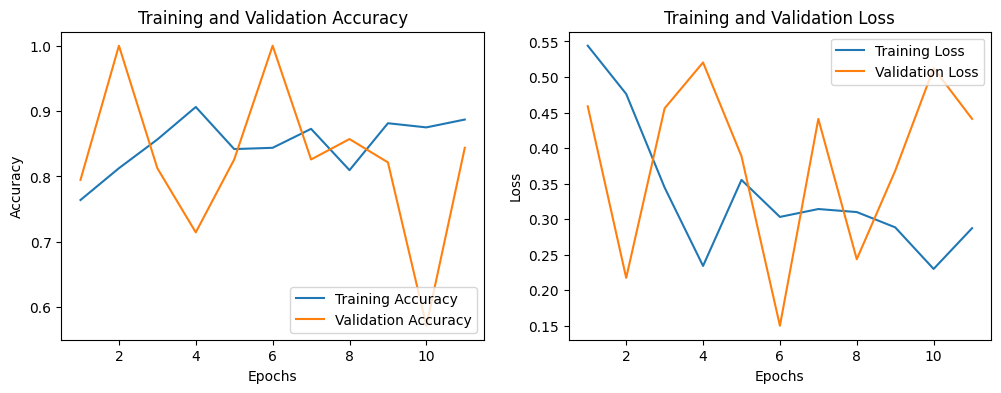

In [12]:
# Define parameters
num_classes = 2  # For binary classification
train_data_dir = '/content/HistopatologyBreastCancerM400X_unhas_makassar.zip/HistopatologyBreastCancerM400X/train'
validation_data_dir = '/content/HistopatologyBreastCancerM400X_unhas_makassar.zip/HistopatologyBreastCancerM400X/validation'
test_data_dir = '/content/HistopatologyBreastCancerM400X_unhas_makassar.zip/HistopatologyBreastCancerM400X/test'
batch_size = 32
epochs = 20


# -- Xception --
from tensorflow.keras.applications.xception import preprocess_input #Xception
input_size = (299, 299)  # Xception expects 299x299 input size
model = build_model_xception(num_classes, learning_rate=0.001, freeze=True)
history = train_model(model, train_data_dir, validation_data_dir, batch_size, epochs, input_size)

### ResNet50V2 Base Model

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Found 917 images belonging to 2 classes.
Found 231 images belonging to 2 classes.
Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 42s 911ms/step - accuracy: 0.7313 - loss: 0.8311 - val_accuracy: 0.8348 - val_loss: 0.4134
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.9062 - loss: 0.2115 - val_accuracy: 0.8571 - val_loss: 0.2322
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 632ms/step - accuracy: 0.8823 - loss: 0.2827 - val_accuracy: 0.8795 - val_loss: 0.3657
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8438 - loss: 0.3370 - val_accuracy: 0.8571 - val_loss: 0.3248
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 626ms/step - accuracy: 0.9051 - loss: 0.2482 - val_accuracy: 0.8661 - val_loss: 0.3538
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9062 - loss: 0.2507 - val_accuracy: 1.0000 - val_loss: 0.1294
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 619ms/step - accuracy: 0.9097 - loss: 0.2166 - val_accura

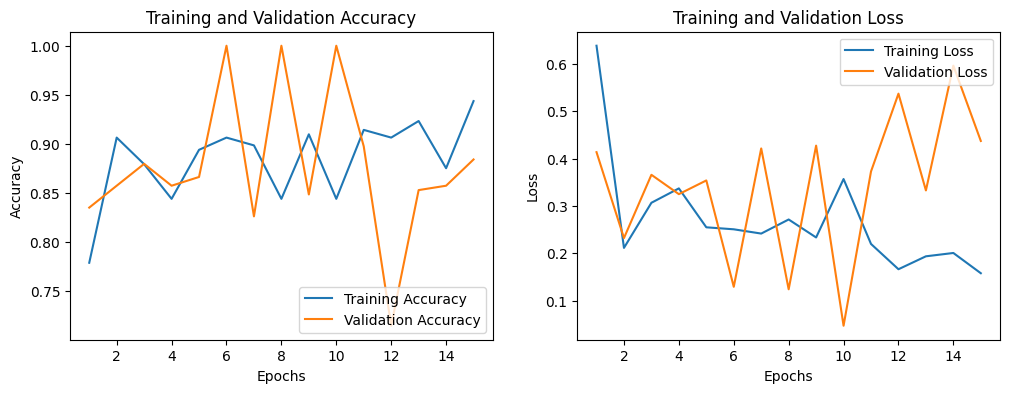

In [13]:
# -- ResNet50V2 --
from tensorflow.keras.applications.resnet_v2 import preprocess_input #ResNet50V2
input_size = (224, 224)  # ResNet50v2 expects 224x224 input size
model = build_model_resnet50v2(num_classes, learning_rate=0.001, freeze=True)
history = train_model(model, train_data_dir, validation_data_dir, batch_size, epochs, input_size)

### InceptionResNetV2 Base Model

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
Found 917 images belonging to 2 classes.
Found 231 images belonging to 2 classes.
Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.6521 - loss: 1.5909 - val_accuracy: 0.7991 - val_loss: 0.4802
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 410ms/step - accuracy: 0.7812 - loss: 0.5084 - val_accuracy: 1.0000 - val_loss: 0.4064
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 29s 829ms/step - accuracy: 0.7919 - loss: 0.4431 - val_accuracy: 0.8393 - val_loss: 0.4312
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7188 - loss: 0.5396 - val_accuracy: 0.8571 - val_loss: 0.5030
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 32s 914ms/step - accuracy: 0.8547 - loss: 0.3671 - val_accuracy: 0.8661 - val_loss: 0.3804
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.8750 - loss: 0.3587 - val_accuracy: 0.7143 - val_loss: 0.3565
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 29s 813ms/step - accuracy: 0.8374 - loss: 0.3730 - val_accur

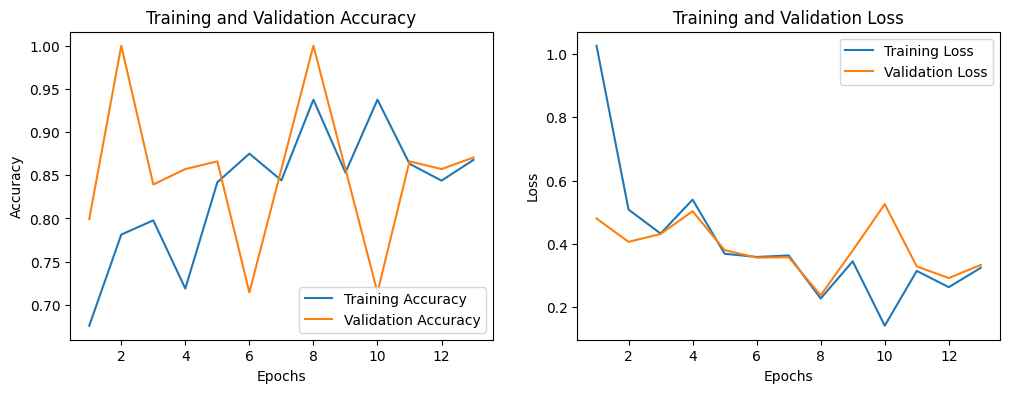

In [14]:
# -- InceptionResNetV2 --
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input #InceptionResNetV2
input_size = (299, 299)  # InceptionResNetV2 expects 299x299 input size
model = build_model_inceptionresnetv2(num_classes, learning_rate=0.001, freeze=True)
history = train_model(model, train_data_dir, validation_data_dir, batch_size, epochs, input_size)

### DenseNet201 Base Model

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Found 917 images belonging to 2 classes.
Found 231 images belonging to 2 classes.
Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.7419 - loss: 0.9609 - val_accuracy: 0.8571 - val_loss: 0.3992
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 633ms/step - accuracy: 0.7812 - loss: 0.4003 - val_accuracy: 1.0000 - val_loss: 0.0662
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 625ms/step - accuracy: 0.8797 - loss: 0.3038 - val_accuracy: 0.8750 - val_loss: 0.3523
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1692 - val_accuracy: 1.0000 - val_loss: 0.2072
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 624ms/step - accuracy: 0.9135 - loss: 0.2374 - val_accuracy: 0.8973 - val_loss: 0.2906
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1186 - val_accuracy: 1.0000 - val_loss: 0.1125
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 627ms/step - accuracy: 0.9328 - loss: 0.1909 - val_accuracy

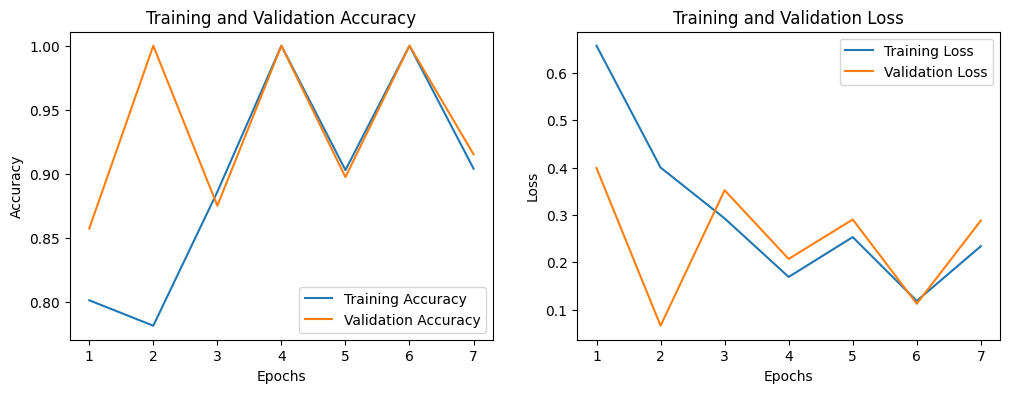

In [15]:
# -- DenseNet201 --
from tensorflow.keras.applications.densenet import preprocess_input #DenseNet201
input_size = (224, 224)  # DenseNet201 expects 224x224 input size
model = build_model_densenet201(num_classes, learning_rate=0.001, freeze=True)
history = train_model(model, train_data_dir, validation_data_dir, batch_size, epochs, input_size)

### EfficientNetB4 Base Model

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Found 917 images belonging to 2 classes.
Found 231 images belonging to 2 classes.
Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.6611 - loss: 0.7911 - val_accuracy: 0.8125 - val_loss: 0.4337
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 455ms/step - accuracy: 0.7812 - loss: 0.4386 - val_accuracy: 1.0000 - val_loss: 0.0891
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8217 - loss: 0.3942 - val_accuracy: 0.8214 - val_loss: 0.3781
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8750 - loss: 0.2902 - val_accuracy: 0.7143 - val_loss: 0.8740
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8356 - loss: 0.3556 - val_accuracy: 0.8616 - val_loss: 0.3446
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8125 - loss: 0.5033 - val_accuracy: 0.8571 - val_loss: 0.3120
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8659 - loss: 0.2967 - val_accuracy: 0.7277 

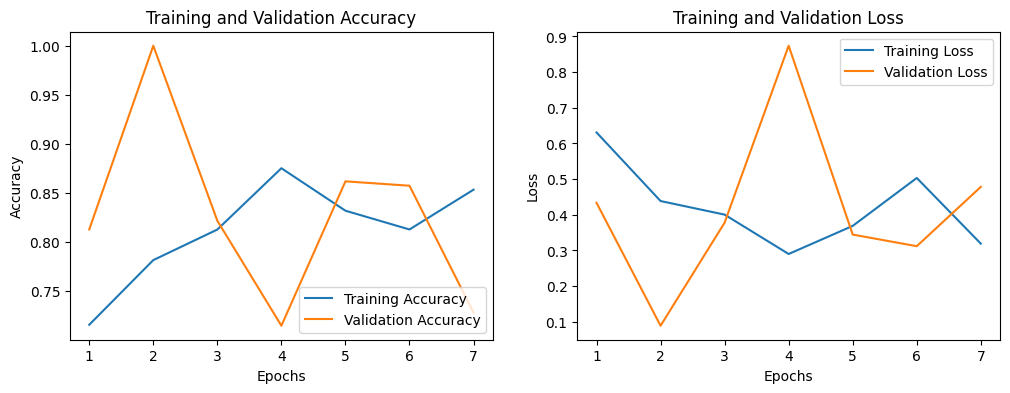

In [16]:
# -- EfficientNetB4 --
from tensorflow.keras.applications.efficientnet import preprocess_input #EfficientNetB4
input_size = (384, 380)  # EfficientNetB4 expects 384x380 input size
model = build_model_efficientnetb4(num_classes, learning_rate=0.001, freeze=True)
history = train_model(model, train_data_dir, validation_data_dir, batch_size, epochs, input_size)

### EfficientNetV2S

82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Found 917 images belonging to 2 classes.
Found 231 images belonging to 2 classes.
Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.6689 - loss: 0.7164 - val_accuracy: 0.8616 - val_loss: 0.3569
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 417ms/step - accuracy: 0.8750 - loss: 0.2428 - val_accuracy: 1.0000 - val_loss: 0.0749
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8325 - loss: 0.3563 - val_accuracy: 0.8705 - val_loss: 0.3205
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8125 - loss: 0.4738 - val_accuracy: 1.0000 - val_loss: 0.0698
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8664 - loss: 0.3095 - val_accuracy: 0.8839 - val_loss: 0.2921
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.1565 - val_accuracy: 1.0000 - val_loss: 0.1004
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8859 - loss: 0.2794 - val_accuracy: 0.8973

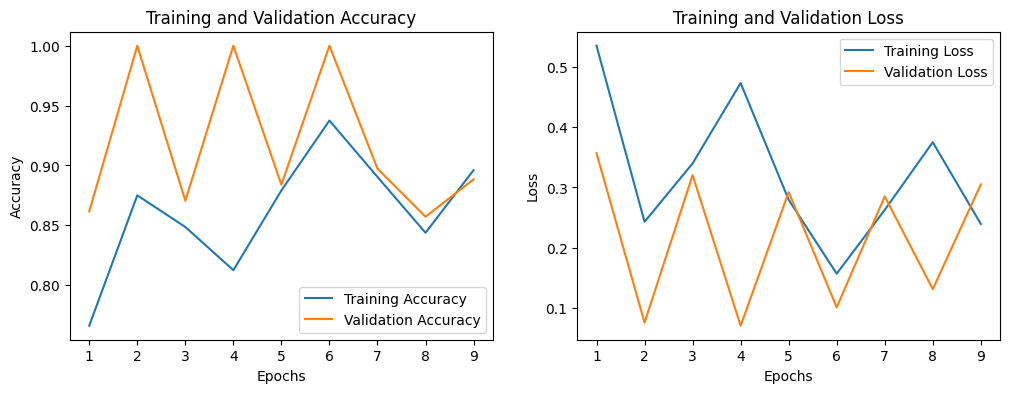

In [17]:
# -- EfficientNetV2S --
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input #EfficientNetV2S
input_size = (384, 384)  # EfficientNetV2S expects 384x384 input size
model = build_model_efficientnetv2s(num_classes, learning_rate=0.001, freeze=True)
history = train_model(model, train_data_dir, validation_data_dir, batch_size, epochs, input_size)

### How to Evaluate a model:
1. Import the preprocessor:
  - e.g. `from tensorflow.keras.applications.xception import preprocess_input`
2. Build the model:
  - e.g. `model = build_model_xception(num_classes, learning_rate=0.001, freeze=True)`
3. Load the weights:
  - e.g. `model.load_weights('/content/best_model_xception.keras')`
4. Test the model:
  - e.g. `test_model(model, test_data_dir, batch_size=32, input_size=(299, 299))`

The performance will be printed directly. Please make sure to import the appropriate preprocessor before running `test_model`. Make sure the model built using `build_model_xxxx` matches with the model you want.

Found 545 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 456ms/step - accuracy: 0.8179 - loss: 0.4376
Test Loss: 0.3568146228790283
Test Accuracy: 0.8495413064956665
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 497ms/step


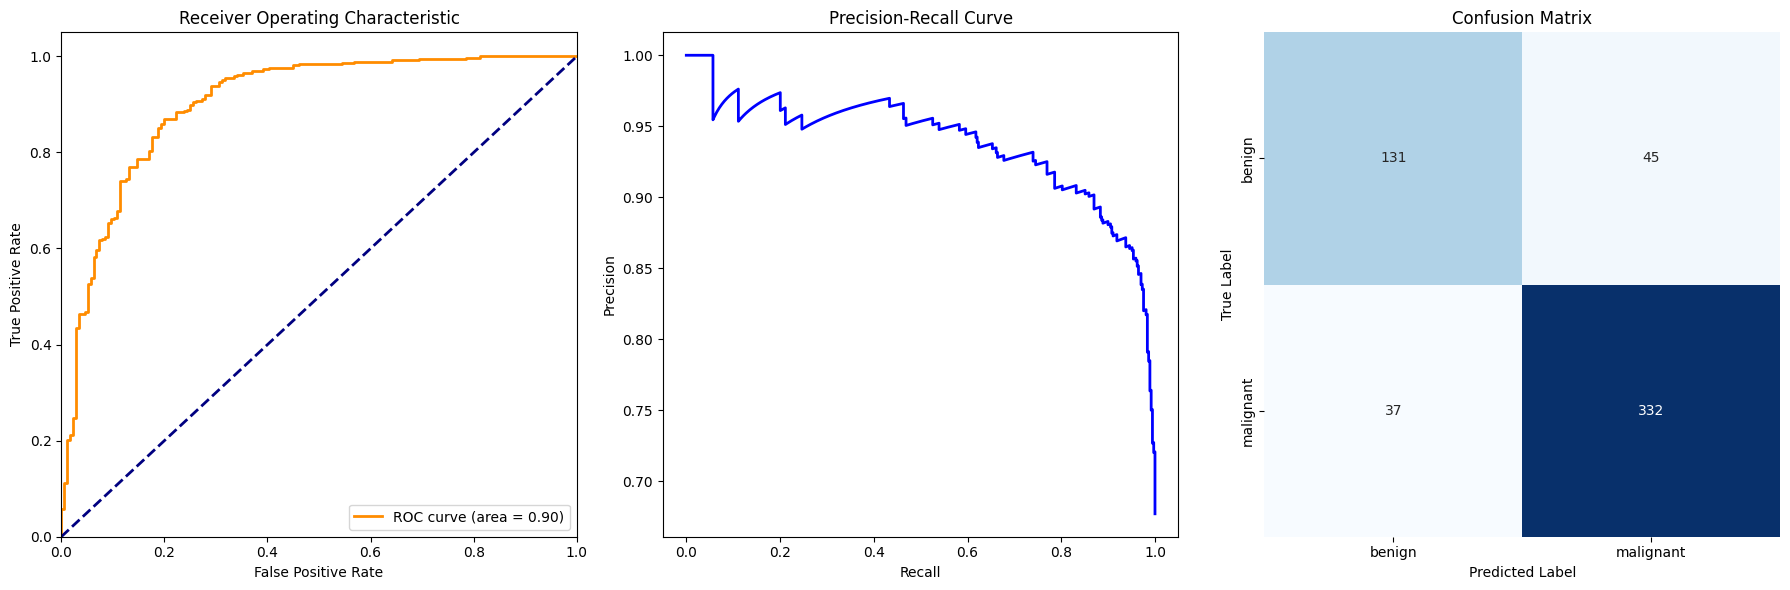

Found 545 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 446ms/step - accuracy: 0.7459 - loss: 0.6776
Test Loss: 0.3994455635547638
Test Accuracy: 0.8513761758804321
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 506ms/step


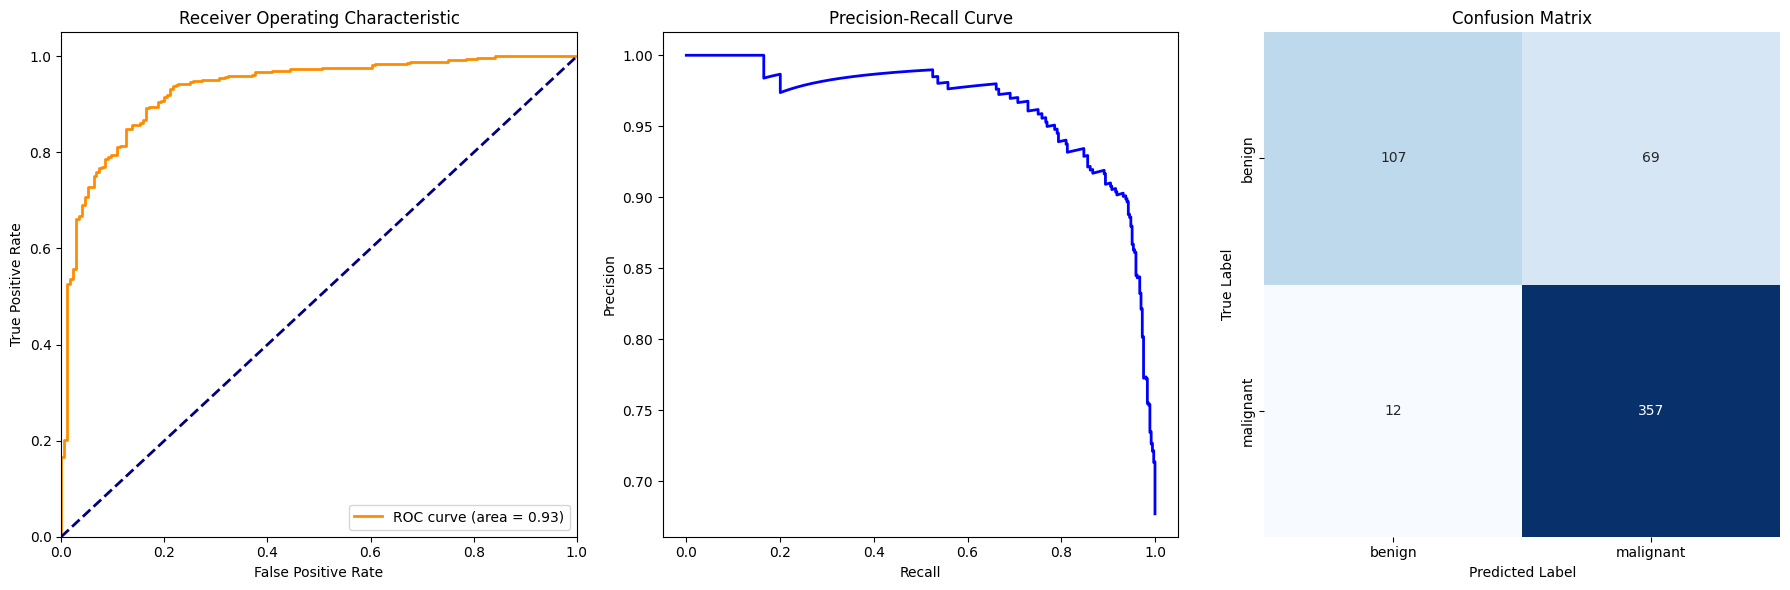

Found 545 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 629ms/step - accuracy: 0.7971 - loss: 0.4231
Test Loss: 0.4077722430229187
Test Accuracy: 0.8256880640983582
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 911ms/step


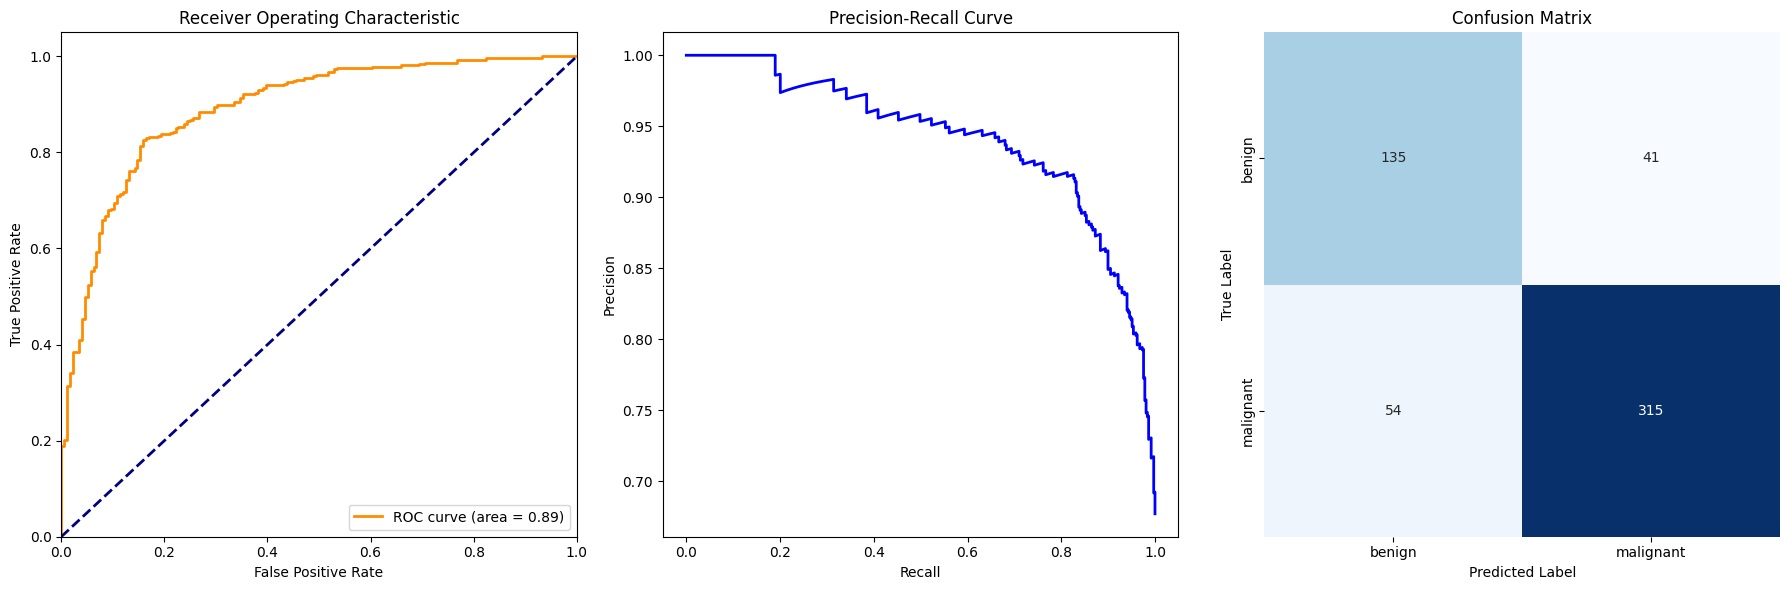

Found 545 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 736ms/step - accuracy: 0.8404 - loss: 0.3853
Test Loss: 0.3894575834274292
Test Accuracy: 0.8330275416374207
18/18 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step


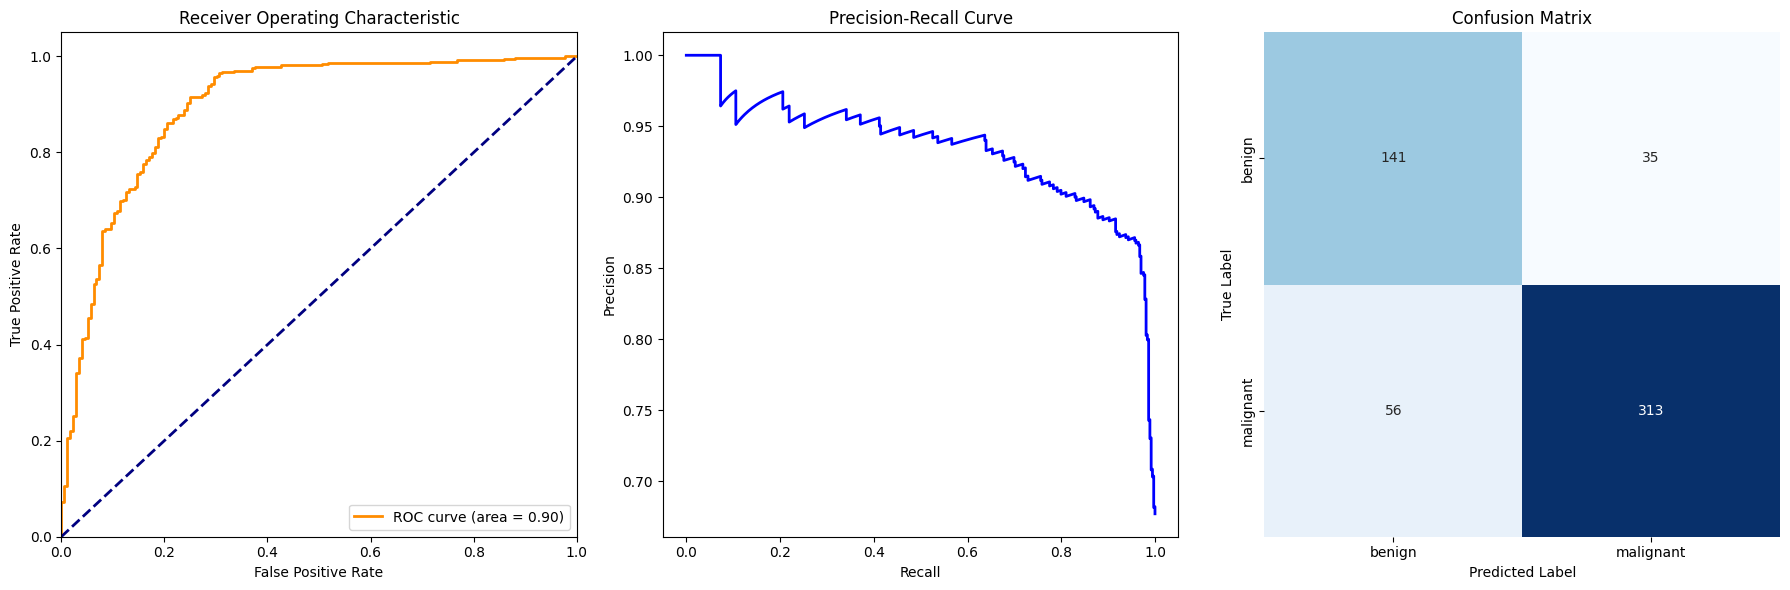

Found 545 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 735ms/step - accuracy: 0.4706 - loss: 0.9929
Test Loss: 0.5734858512878418
Test Accuracy: 0.721100926399231
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 987ms/step


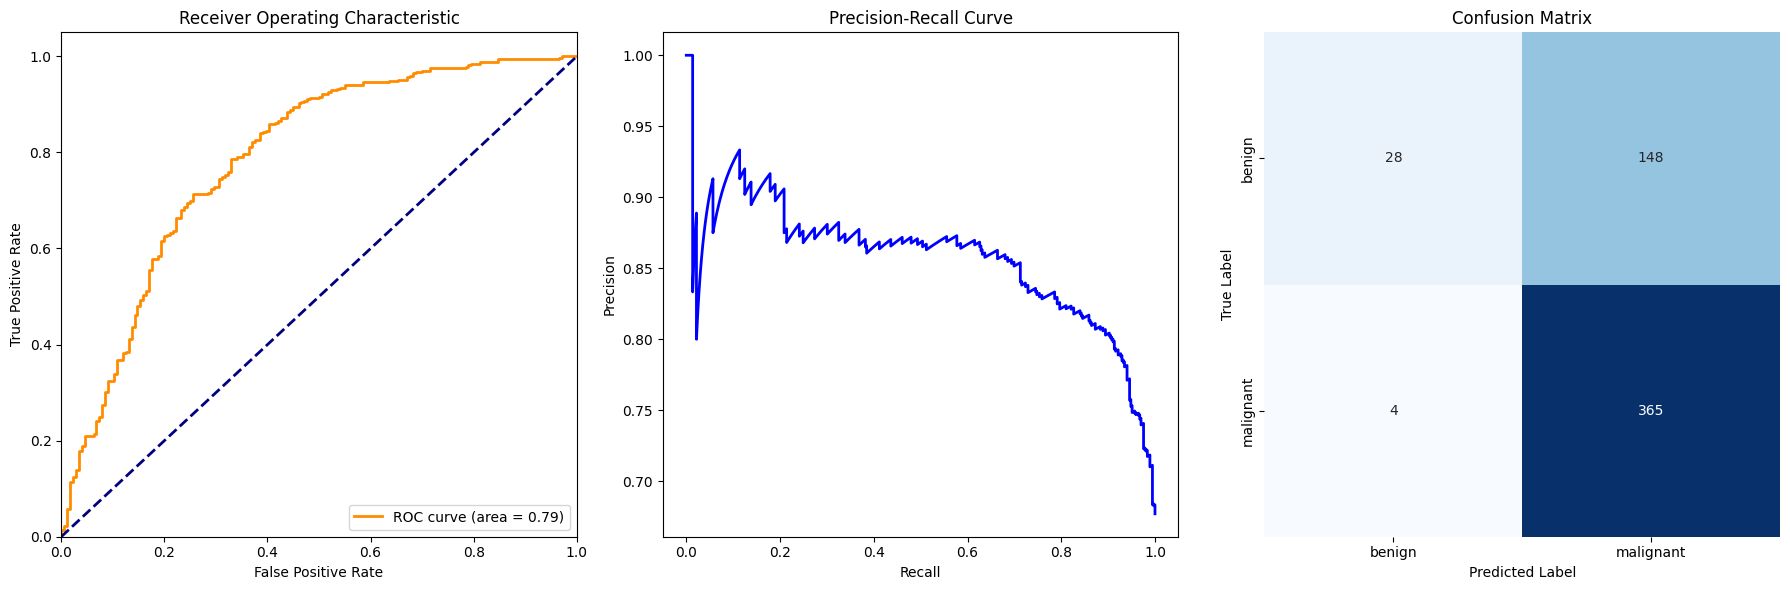

Found 545 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 714ms/step - accuracy: 0.7627 - loss: 0.4537
Test Loss: 0.29334452748298645
Test Accuracy: 0.8697247505187988
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 974ms/step


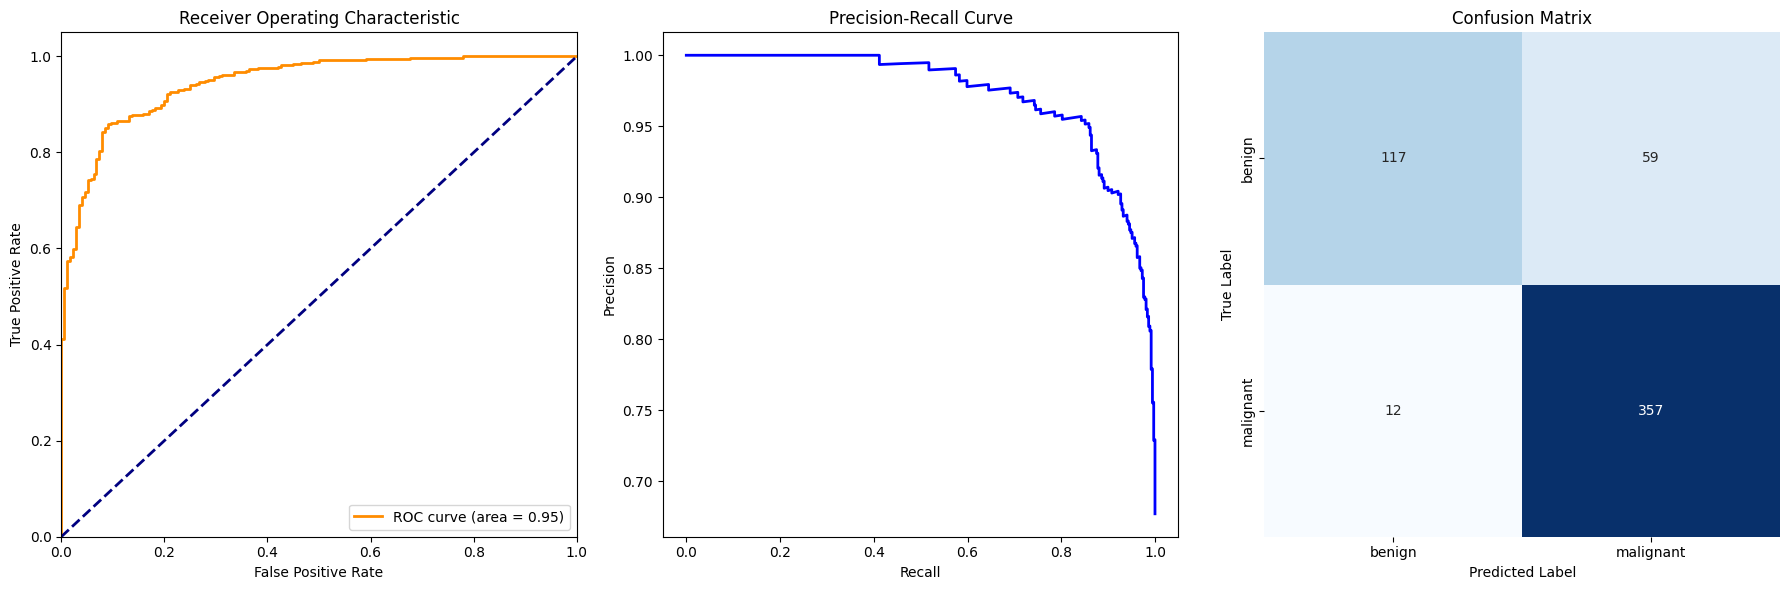

In [20]:
# -- Xception --
from tensorflow.keras.applications.xception import preprocess_input
input_size = (299, 299)
model = build_model_xception(num_classes, learning_rate=0.001, freeze=True)
model.load_weights('/content/best_model_xception.keras')
test_model(model, test_data_dir, batch_size=32, input_size=input_size)

# -- ResNet50V2 --
from tensorflow.keras.applications.resnet_v2 import preprocess_input #ResNet50V2
model = build_model_resnet50v2(num_classes, learning_rate=0.001, freeze=True)
model.load_weights('/content/best_model_resnet50v2.keras')
input_size = (224, 224)  # ResNet50v2 expects 224x224 input size
test_model(model, test_data_dir, batch_size=32, input_size=input_size)

# -- InceptionResNetV2 --
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input #InceptionResNetV2
input_size = (299, 299)  # InceptionResNetV2 expects 299x299 input size
model = build_model_inceptionresnetv2(num_classes, learning_rate=0.001, freeze=True)
model.load_weights('/content/best_model_inceptionresnetv2.keras')
test_model(model, test_data_dir, batch_size=32, input_size=input_size)

# -- DenseNet201 --
from tensorflow.keras.applications.densenet import preprocess_input #DenseNet201
input_size = (224, 224)  # DenseNet201 expects 224x224 input size
model = build_model_densenet201(num_classes, learning_rate=0.001, freeze=True)
model.load_weights('/content/best_model_densenet201.keras')
test_model(model, test_data_dir, batch_size=32, input_size=input_size)

# -- EfficientNetB4 --
from tensorflow.keras.applications.efficientnet import preprocess_input #EfficientNetB4
input_size = (384, 380)  # EfficientNetB4 expects 384x380 input size
model = build_model_efficientnetb4(num_classes, learning_rate=0.001, freeze=True)
model.load_weights('/content/best_model_efficientnetb4.keras')
test_model(model, test_data_dir, batch_size=32, input_size=input_size)

# -- EfficientNetV2S --
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input #EfficientNetV2S
input_size = (384, 384)  # EfficientNetV2S expects 384x384 input size
model = build_model_efficientnetv2s(num_classes, learning_rate=0.001, freeze=True)
model.load_weights('/content/best_model_efficientnetv2s.keras')
test_model(model, test_data_dir, batch_size=32, input_size=input_size)

### How to fine-tune a model:
1. Import the preprocessor:
  - e.g. `from tensorflow.keras.applications.xception import preprocess_input`
2. Build the model with smaller `learning_rate` and set `freeze` to false:
  - e.g. `model = build_model_xception(num_classes, learning_rate=0.0001, freeze=True)`
3. Load the weights:
  - e.g. `model.load_weights('/content/best_model_xception.keras')`
4. Train the model:
  - e.g. `history = train_model(model, train_data_dir, validation_data_dir, batch_size, epochs, input_size=(299,299))`
  
The model will be saved as `best_model.keras`. Rename the model or download it before doing another training run.

### Xception Fine-tuned Model

Found 917 images belonging to 2 classes.
Found 231 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.7651 - loss: 0.4737 - val_accuracy: 0.7589 - val_loss: 0.8124
Epoch 2/20
 1/28 ━━━━━━━━━━━━━━━━━━━━ 9s 354ms/step - accuracy: 0.8438 - loss: 0.3773

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.8438 - loss: 0.3773 - val_accuracy: 0.8571 - val_loss: 0.3102
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 31s 887ms/step - accuracy: 0.9255 - loss: 0.1847 - val_accuracy: 0.8080 - val_loss: 0.4601
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0367 - val_accuracy: 0.8571 - val_loss: 0.6683
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 31s 864ms/step - accuracy: 0.9621 - loss: 0.0973 - val_accuracy: 0.8438 - val_loss: 0.3550
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 1.0000 - loss: 0.0232 - val_accuracy: 1.0000 - val_loss: 0.0849
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 31s 875ms/step - accuracy: 0.9806 - loss: 0.0637 - val_accuracy: 0.8393 - val_loss: 0.4442
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 1.0000 - loss: 0.0395 - val_accuracy: 1.0000 - val_loss: 0.0115
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 31s 867ms/step - accuracy: 0.9939 - loss: 0.0292 - val_accuracy: 0.9420 - val_

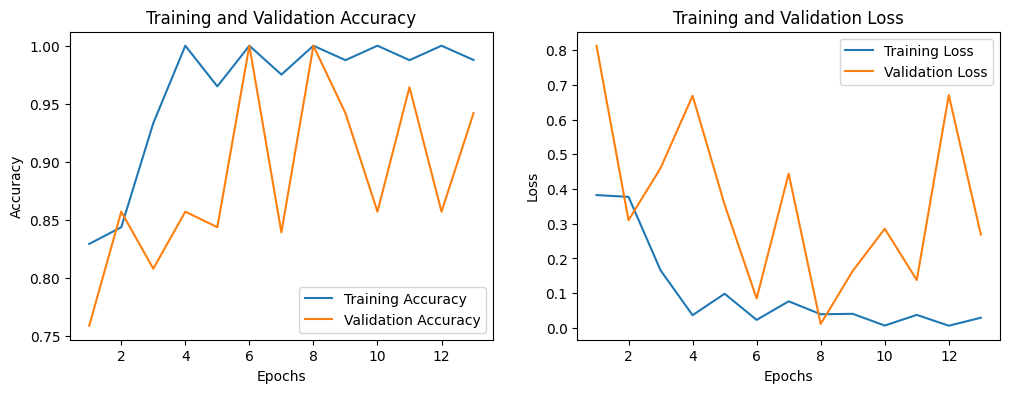

In [21]:
# -- Xception --
from tensorflow.keras.applications.xception import preprocess_input
model = build_model_xception(num_classes, learning_rate=0.0001, freeze=False)
model.load_weights('/content/best_model_xception.keras')
input_size = (299, 299)
history = train_model(model, train_data_dir, validation_data_dir, batch_size, epochs, input_size=input_size)

### ResNet50V2 Fine-tuned Model

Found 917 images belonging to 2 classes.
Found 231 images belonging to 2 classes.
Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.7659 - loss: 0.5705 - val_accuracy: 0.8527 - val_loss: 0.3480
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.8125 - loss: 0.3124 - val_accuracy: 1.0000 - val_loss: 0.1565
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 23s 633ms/step - accuracy: 0.8058 - loss: 0.3946 - val_accuracy: 0.8438 - val_loss: 0.3527
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7188 - loss: 0.4989 - val_accuracy: 1.0000 - val_loss: 0.1670
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 23s 633ms/step - accuracy: 0.8564 - loss: 0.3557 - val_accuracy: 0.8750 - val_loss: 0.3256
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8750 - loss: 0.2616 - val_accuracy: 0.7143 - val_loss: 0.3789
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 632ms/step - accuracy: 0.8792 - loss: 0.2889 - val_accuracy: 0.8795 - val_loss: 0.3141


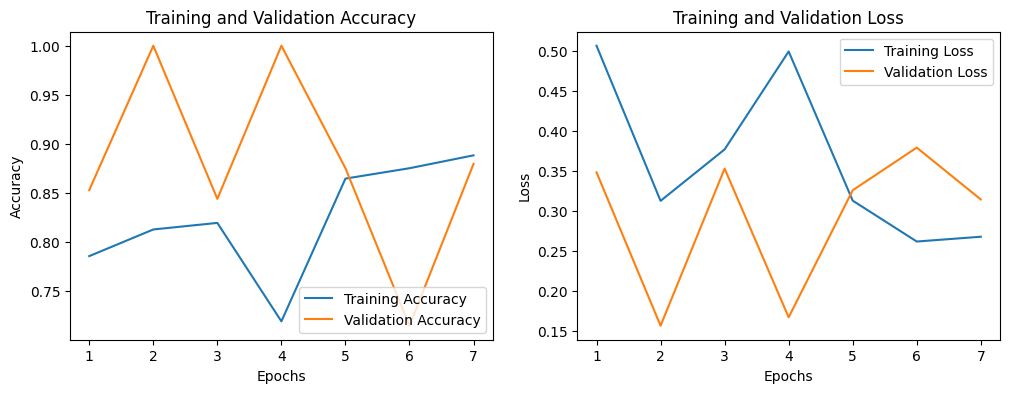

In [22]:
# -- ResNet50V2 --
from tensorflow.keras.applications.resnet_v2 import preprocess_input #ResNet50V2
model = build_model_resnet50v2(num_classes, learning_rate=0.00001, freeze=False)
model.load_weights('/content/best_model_resnet50v2.keras')
input_size = (224, 224)  # ResNet50v2 expects 224x224 input size
history = train_model(model, train_data_dir, validation_data_dir, batch_size, epochs, input_size=input_size)

### InceptionResNetV2 Fine-tuned Model

Found 917 images belonging to 2 classes.
Found 231 images belonging to 2 classes.
Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 291s 4s/step - accuracy: 0.7732 - loss: 0.4670 - val_accuracy: 0.6696 - val_loss: 2.9794
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 330ms/step - accuracy: 0.6875 - loss: 0.4970 - val_accuracy: 0.8571 - val_loss: 1.7538
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 31s 895ms/step - accuracy: 0.9384 - loss: 0.1776 - val_accuracy: 0.6830 - val_loss: 2.3259
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.7812 - loss: 0.4465 - val_accuracy: 0.7143 - val_loss: 1.6775
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9641 - loss: 0.0968 - val_accuracy: 0.7723 - val_loss: 1.2623
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9688 - loss: 0.0875 - val_accuracy: 0.5714 - val_loss: 1.9096
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9786 - loss: 0.0634 - val_accuracy: 0.8348 - val_loss: 0.7426
Epoch 8/20
28/28 ━━━━━━━━━━━

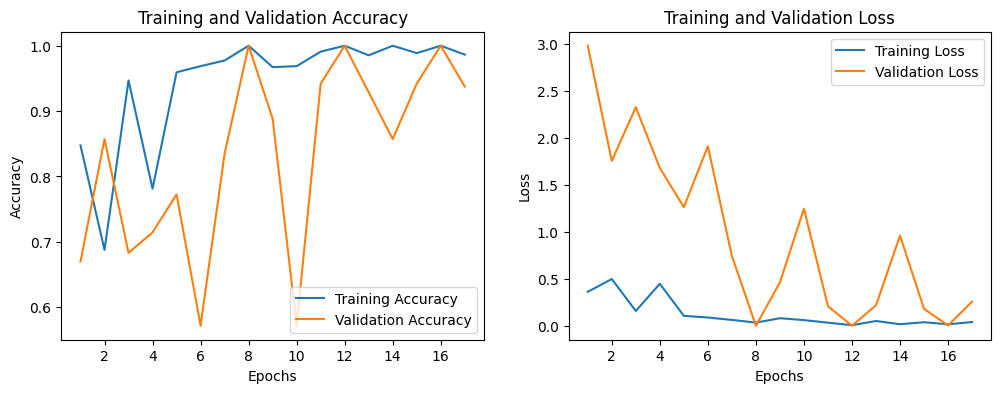

In [23]:
# -- InceptionResNetV2 --
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input #InceptionResNetV2
input_size = (299, 299)  # InceptionResNetV2 expects 299x299 input size
model = build_model_inceptionresnetv2(num_classes, learning_rate=0.0001, freeze=False)
model.load_weights('/content/best_model_inceptionresnetv2.keras')
history = train_model(model, train_data_dir, validation_data_dir, batch_size, epochs, input_size=input_size)

### DenseNet201 Fine-tuned Model

Found 917 images belonging to 2 classes.
Found 231 images belonging to 2 classes.
Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 638s 10s/step - accuracy: 0.7614 - loss: 0.5189 - val_accuracy: 0.6875 - val_loss: 2.1417
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 347ms/step - accuracy: 0.9062 - loss: 0.2076 - val_accuracy: 0.7143 - val_loss: 1.1562
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 26s 771ms/step - accuracy: 0.9345 - loss: 0.1613 - val_accuracy: 0.7500 - val_loss: 1.1387
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9375 - loss: 0.1598 - val_accuracy: 0.7143 - val_loss: 1.6751
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 26s 767ms/step - accuracy: 0.9772 - loss: 0.0786 - val_accuracy: 0.8125 - val_loss: 0.7953
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0182 - val_accuracy: 0.5714 - val_loss: 1.0891
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 27s 779ms/step - accuracy: 0.9897 - loss: 0.0369 - val_accuracy: 0.8393 - val_loss: 0.6675
Epoch 8/20
28/28 ━━━━━

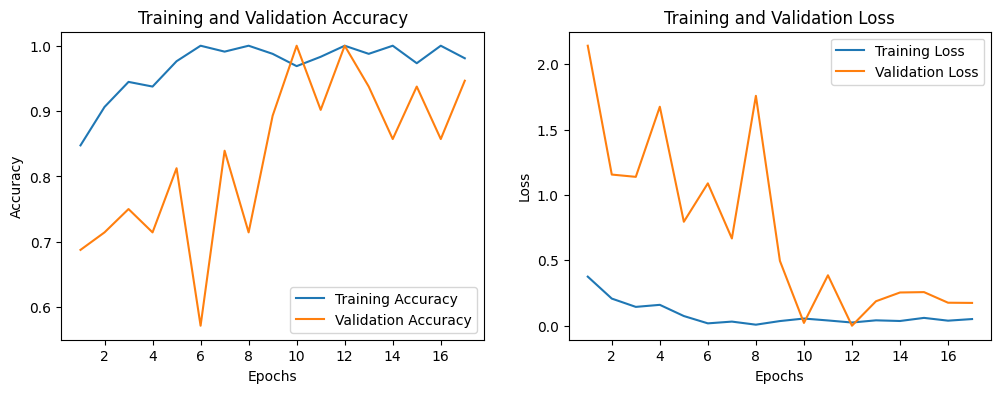

In [24]:
# -- DenseNet201 --
from tensorflow.keras.applications.densenet import preprocess_input #DenseNet201
input_size = (224, 224)  # DenseNet201 expects 224x224 input size
model = build_model_densenet201(num_classes, learning_rate=0.0001, freeze=False)
model.load_weights('/content/best_model_densenet201.keras')
history = train_model(model, train_data_dir, validation_data_dir, batch_size, epochs, input_size=input_size)

### EfficientNetB4 Fine-tuned Model

Found 917 images belonging to 2 classes.
Found 231 images belonging to 2 classes.
Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 314s 5s/step - accuracy: 0.6968 - loss: 0.5818 - val_accuracy: 0.7188 - val_loss: 0.6223
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - accuracy: 0.8750 - loss: 0.2427 - val_accuracy: 0.4286 - val_loss: 0.8347
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9295 - loss: 0.1886 - val_accuracy: 0.7500 - val_loss: 0.5301
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.1039 - val_accuracy: 0.4286 - val_loss: 1.0512
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9527 - loss: 0.1396 - val_accuracy: 0.8170 - val_loss: 0.3914
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.9688 - loss: 0.1237 - val_accuracy: 0.8571 - val_loss: 0.2881
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9588 - loss: 0.0961 - val_accuracy: 0.8170 - val_loss: 0.3863
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━

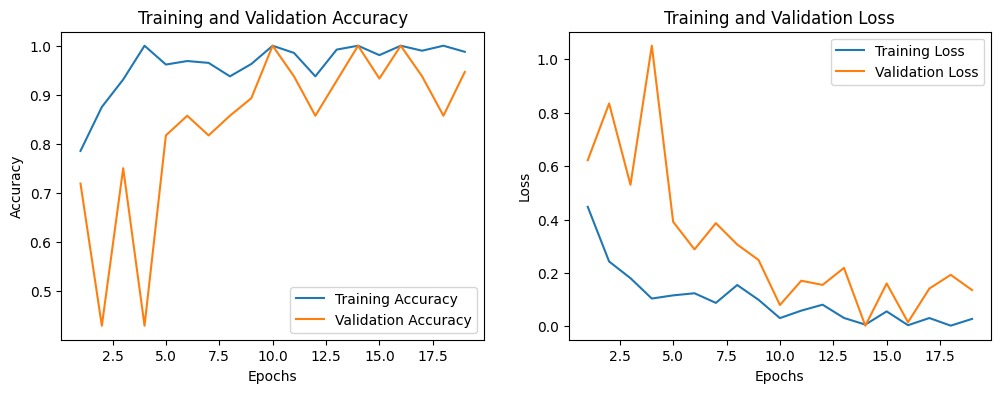

In [25]:
# -- EfficientNetB4 --
from tensorflow.keras.applications.efficientnet import preprocess_input #EfficientNetB4
input_size = (384, 380)  # EfficientNetB4 expects 384x380 input size
model = build_model_efficientnetb4(num_classes, learning_rate=0.0001, freeze=False)
model.load_weights('/content/best_model_efficientnetb4.keras')
history = train_model(model, train_data_dir, validation_data_dir, batch_size, epochs, input_size=input_size)

### EfficientNetV2S Fine-tuned Model

Found 917 images belonging to 2 classes.
Found 231 images belonging to 2 classes.
Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 309s 5s/step - accuracy: 0.7024 - loss: 0.5763 - val_accuracy: 0.9107 - val_loss: 0.2100
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step - accuracy: 0.8438 - loss: 0.2523 - val_accuracy: 1.0000 - val_loss: 0.0449
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9483 - loss: 0.1769 - val_accuracy: 0.9420 - val_loss: 0.1679
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9688 - loss: 0.0872 - val_accuracy: 1.0000 - val_loss: 0.1497
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9590 - loss: 0.1189 - val_accuracy: 0.9554 - val_loss: 0.1677
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0109 - val_accuracy: 0.8571 - val_loss: 0.2269
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9886 - loss: 0.0455 - val_accuracy: 0.9554 - val_loss: 0.1474


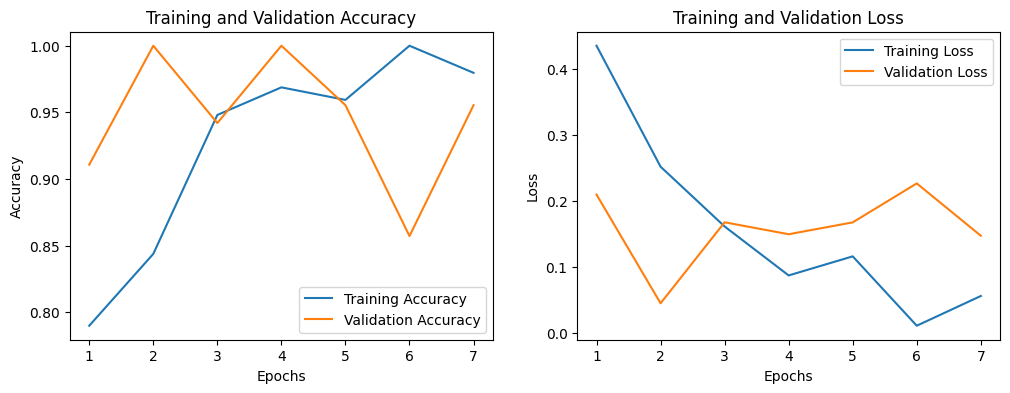

In [26]:
# -- EfficientNetV2S --
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input #EfficientNetV2S
input_size = (384, 384)  # EfficientNetV2S expects 384x384 input size
model = build_model_efficientnetv2s(num_classes, learning_rate=0.0001, freeze=False)
model.load_weights('/content/best_model_efficientnetv2s.keras')
history = train_model(model, train_data_dir, validation_data_dir, batch_size, epochs, input_size=input_size)

Found 545 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 318 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 462ms/step - accuracy: 0.7079 - loss: 0.8847
Test Loss: 0.46462133526802063
Test Accuracy: 0.8513761758804321
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 483ms/step


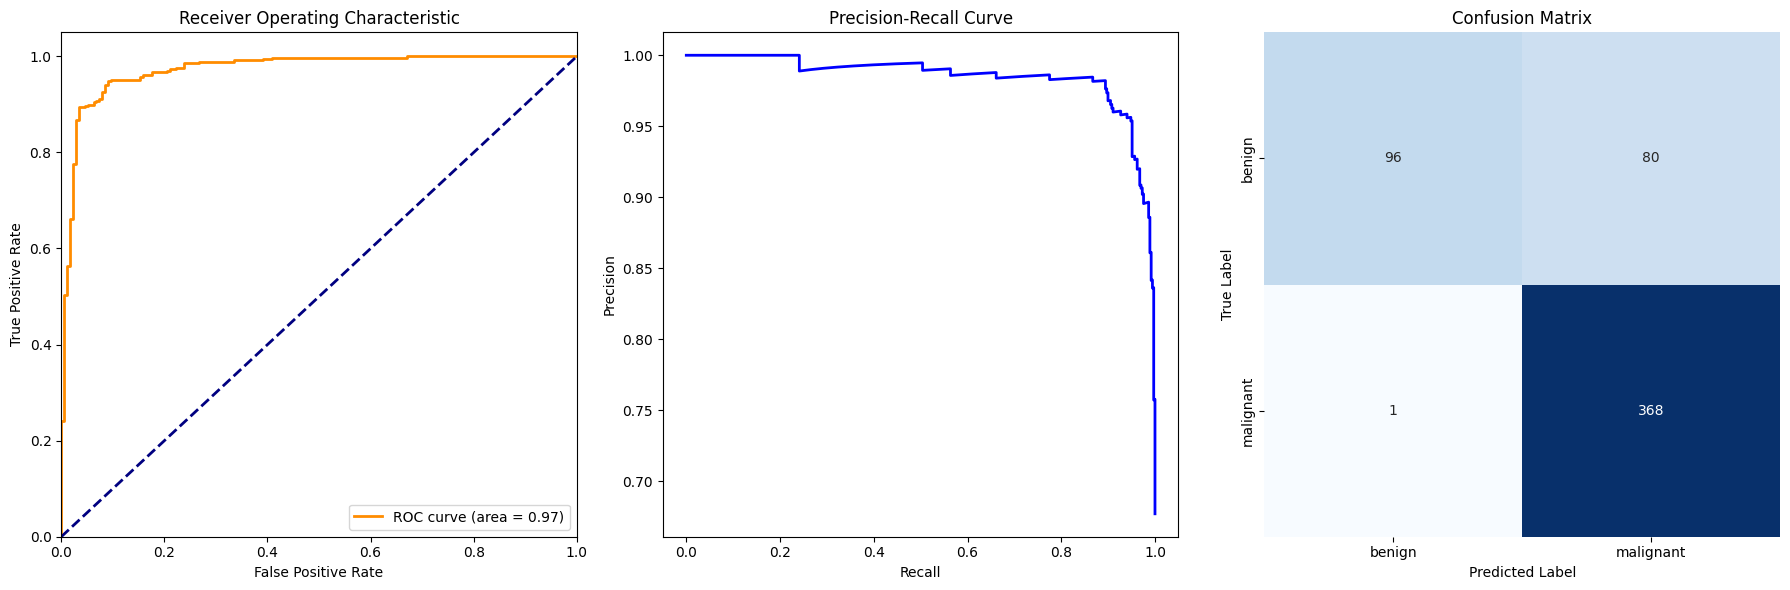

Found 545 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 354 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 446ms/step - accuracy: 0.8591 - loss: 0.3590
Test Loss: 0.3284533619880676
Test Accuracy: 0.8715596199035645
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 496ms/step


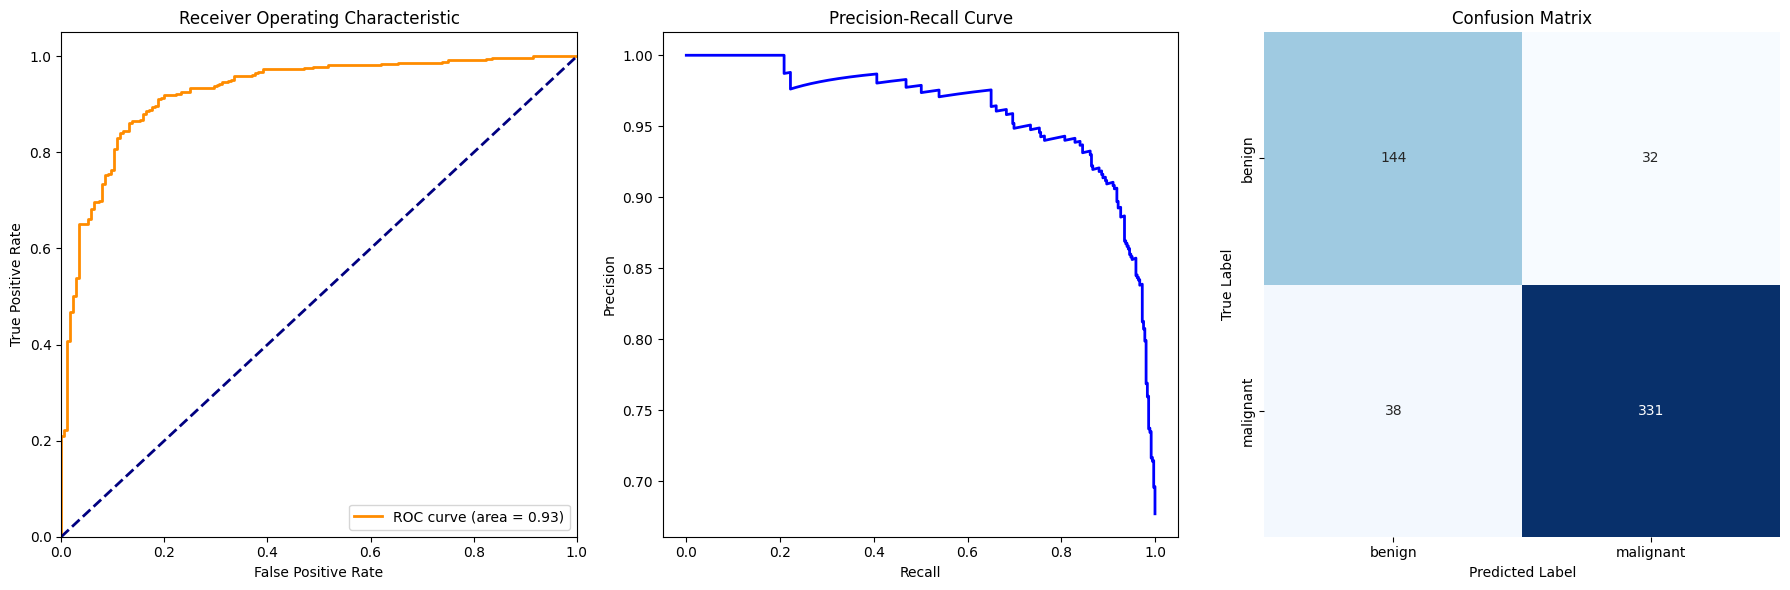

Found 545 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 986 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 617ms/step - accuracy: 0.8961 - loss: 0.4062
Test Loss: 0.2541511058807373
Test Accuracy: 0.9339449405670166
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 910ms/step


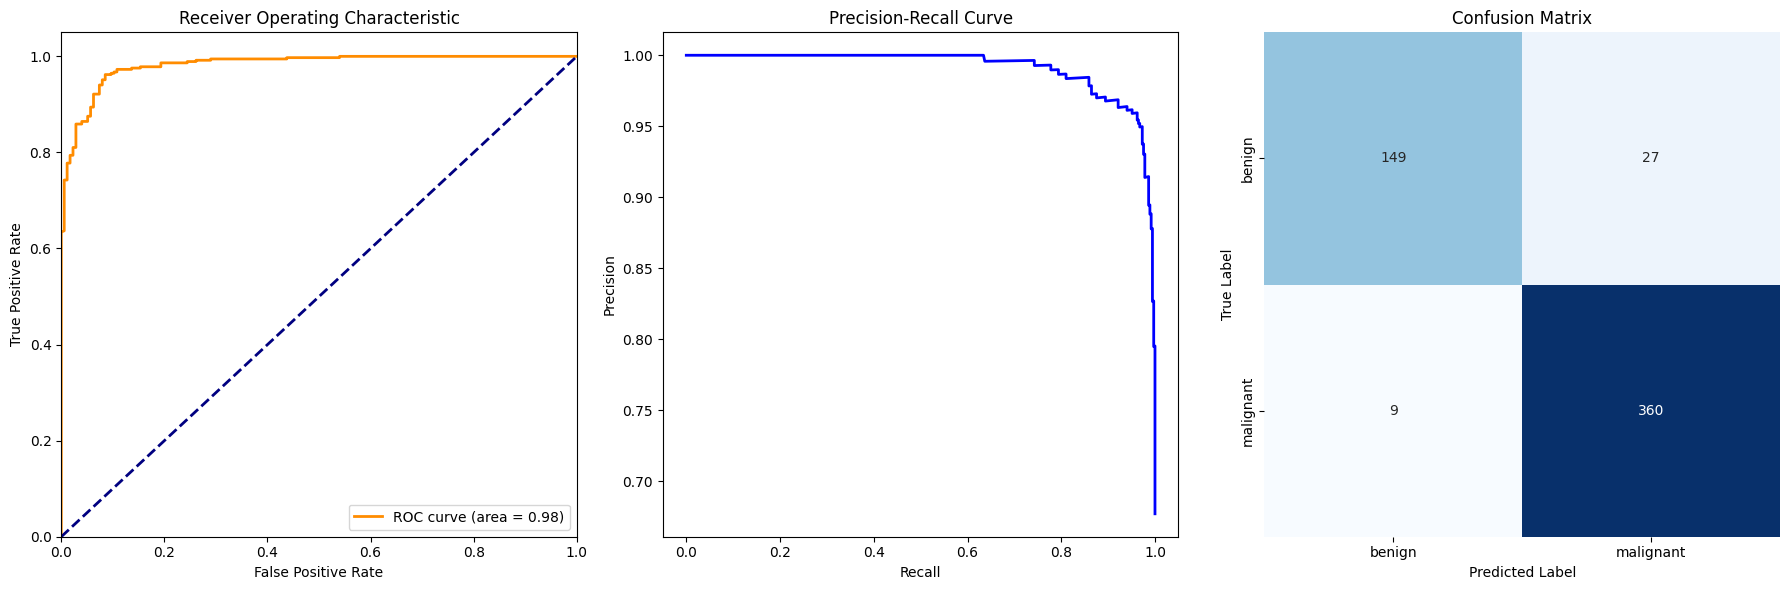

Found 545 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 1214 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 732ms/step - accuracy: 0.8798 - loss: 0.4548
Test Loss: 0.273258239030838
Test Accuracy: 0.9302752017974854
18/18 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step


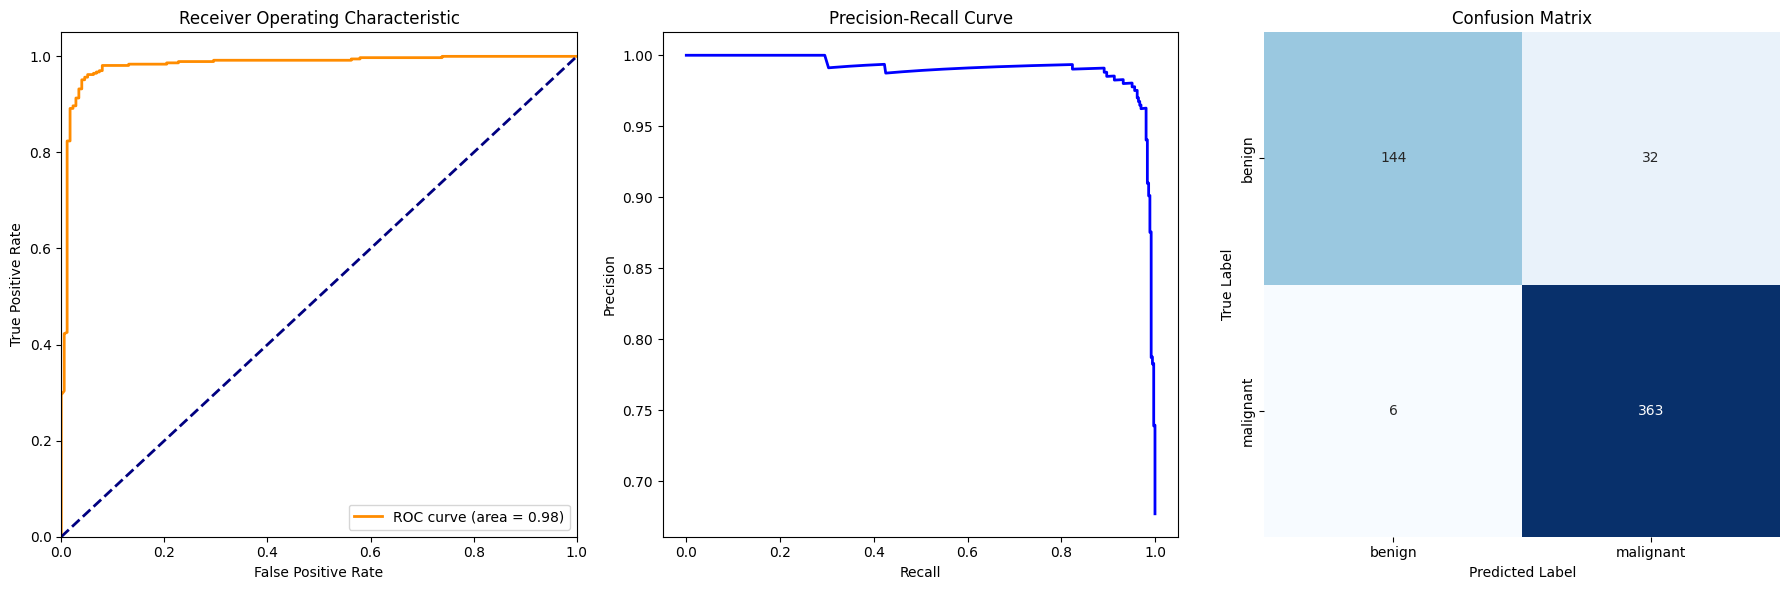

Found 545 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 842 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 739ms/step - accuracy: 0.9056 - loss: 0.2703
Test Loss: 0.21218624711036682
Test Accuracy: 0.9284403920173645
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 947ms/step


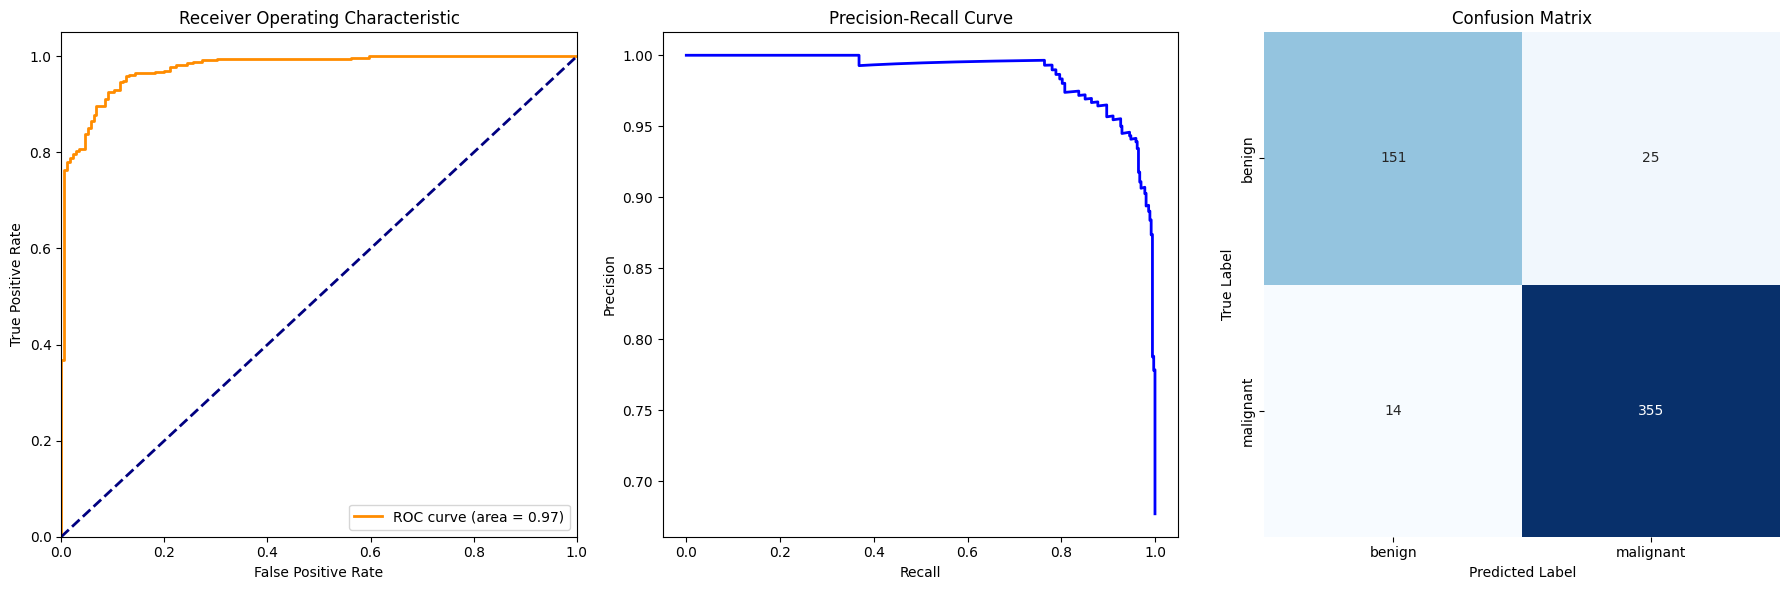

Found 545 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 910 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 723ms/step - accuracy: 0.8641 - loss: 0.3229
Test Loss: 0.25179383158683777
Test Accuracy: 0.9009174108505249
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 950ms/step


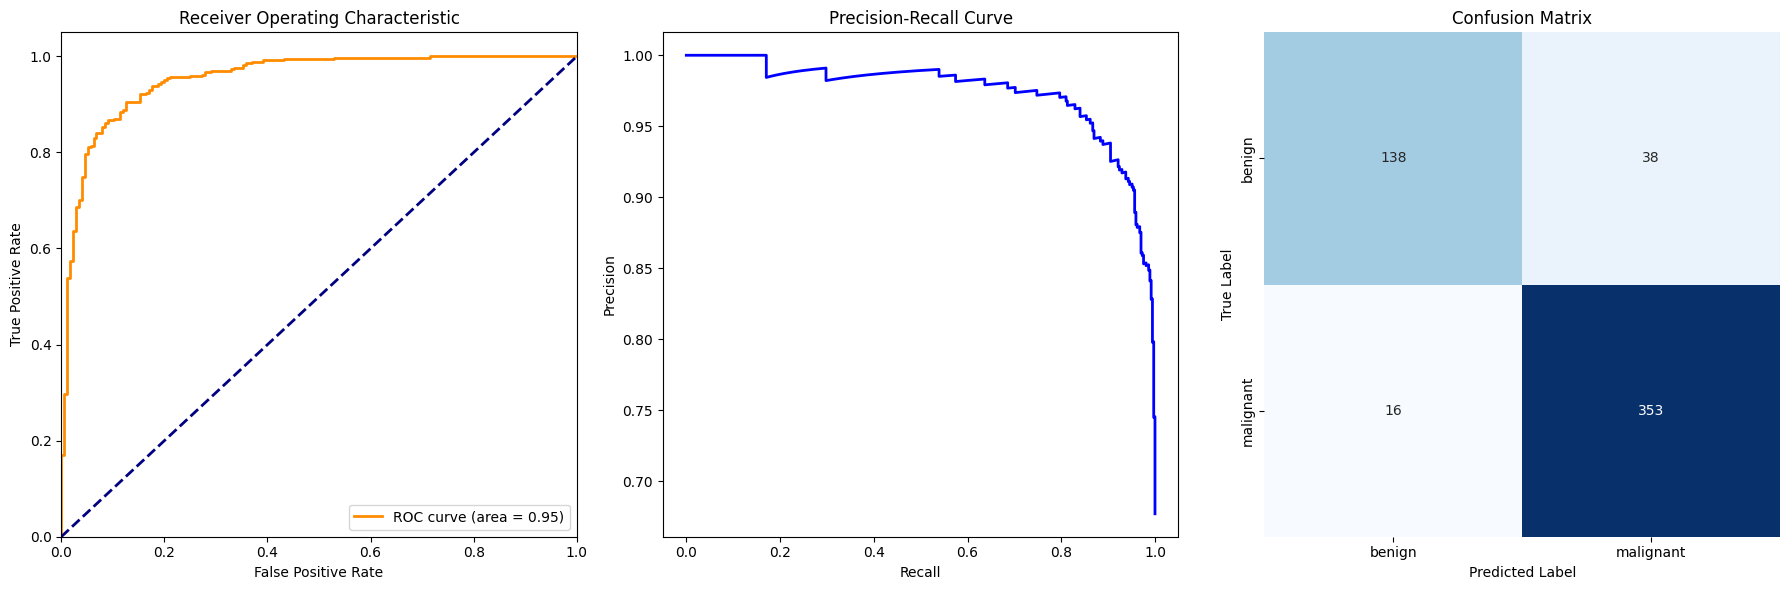

In [27]:
# -- Xception --
from tensorflow.keras.applications.xception import preprocess_input
input_size = (299, 299)
model = build_model_xception(num_classes, learning_rate=0.0001, freeze=False)
model.load_weights('/content/best_model_xception_finetuned.keras')
test_model(model, test_data_dir, batch_size=32, input_size=input_size)

# -- ResNet50V2 --
from tensorflow.keras.applications.resnet_v2 import preprocess_input #ResNet50V2
model = build_model_resnet50v2(num_classes, learning_rate=0.0001, freeze=False)
model.load_weights('/content/best_model_resnet50v2_finetuned.keras')
input_size = (224, 224)  # ResNet50v2 expects 224x224 input size
test_model(model, test_data_dir, batch_size=32, input_size=input_size)

# -- InceptionResNetV2 --
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input #InceptionResNetV2
input_size = (299, 299)  # InceptionResNetV2 expects 299x299 input size
model = build_model_inceptionresnetv2(num_classes, learning_rate=0.0001, freeze=False)
model.load_weights('/content/best_model_inceptionresnetv2_finetuned.keras')
test_model(model, test_data_dir, batch_size=32, input_size=input_size)

# -- DenseNet201 --
from tensorflow.keras.applications.densenet import preprocess_input #DenseNet201
input_size = (224, 224)  # DenseNet201 expects 224x224 input size
model = build_model_densenet201(num_classes, learning_rate=0.0001, freeze=False)
model.load_weights('/content/best_model_densenet201_finetuned.keras')
test_model(model, test_data_dir, batch_size=32, input_size=input_size)

# -- EfficientNetB4 --
from tensorflow.keras.applications.efficientnet import preprocess_input #EfficientNetB4
input_size = (384, 380)  # EfficientNetB4 expects 384x380 input size
model = build_model_efficientnetb4(num_classes, learning_rate=0.0001, freeze=False)
model.load_weights('/content/best_model_efficientnetb4_finetuned.keras')
test_model(model, test_data_dir, batch_size=32, input_size=input_size)

# -- EfficientNetV2S --
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input #EfficientNetV2S
input_size = (384, 384)  # EfficientNetV2S expects 384x384 input size
model = build_model_efficientnetv2s(num_classes, learning_rate=0.0001, freeze=False)
model.load_weights('/content/best_model_efficientnetv2s_finetuned.keras')
test_model(model, test_data_dir, batch_size=32, input_size=input_size)

# 6. Ensemble Model Function

This section of code includes functions for generating model predictions, combining probabilities (in case of an ensemble), and evaluating model accuracy. Each function is designed to handle specific tasks in the evaluation process of a deep learning model.

### Functions:

1. **`generate_output_probability`**:
   - **Purpose:** To generate predicted probabilities for the test dataset using a trained model.
   - **Inputs:**
     - `model`: The trained deep learning model used for making predictions.
     - `test_data_dir`: The directory containing the test images, organized by class subdirectories.
     - `batch_size`: The number of images processed in each prediction step (default is 32).
     - `input_size`: The target size for resizing images before they are fed into the model (default is 299x299).
   - **Output:** A numpy array of predicted probabilities for each class.

2. **`combine_output_probability`**:
   - **Purpose:** To combine probabilities from multiple models in an ensemble.
   - **Input:**
     - `probabilities`: A list or array of predicted probabilities from different models.
   - **Output:** The average of the probabilities from all models, which represents the combined prediction.

3. **`evaluate_accuracy`**:
   - **Purpose:** To calculate the accuracy of the model based on the predicted probabilities and true labels from the test dataset.
   - **Inputs:**
     - `probability`: The array of predicted probabilities for the test dataset.
     - `test_data_dir`: The directory containing the test images, organized by class subdirectories.
     - `batch_size`: The number of images processed in each evaluation step (default is 32).
     - `input_size`: The target size for resizing images before they are fed into the model (default is 299x299).
   - **Output:** The accuracy score, which indicates the proportion of correctly classified test samples.

These functions are essential for evaluating the performance of your model or ensemble, providing insights into how well your model generalizes to new, unseen data.


In [29]:
import numpy as np
from sklearn.metrics import accuracy_score

def generate_output_probability(model, test_data_dir, batch_size=32, input_size=(299, 299)):
    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

    # Generator for test data
    test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=input_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

    # Generate probabilities
    probabilities = model.predict(test_generator)

    return probabilities

def combine_output_probability(probabilities):
    # Combine probabilities from all models
    combined_probabilities = np.mean(probabilities, axis=0)

    return combined_probabilities

def evaluate_accuracy(probability, test_data_dir, batch_size=32, input_size=(299, 299)):
    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

    # Generator for test data
    test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=input_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

    # Get the true labels
    true_labels = test_generator.classes

    # Get the predicted labels
    predicted_labels = np.argmax(probability, axis=1)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f"Accuracy: {accuracy:.4f}")


    # Compute the AUC-ROC curve
    fpr, tpr, _ = roc_curve(true_labels, probability[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)

    # Compute precision-recall curve
    precision, recall, _ = precision_recall_curve(true_labels, probability[:, 1], pos_label=1)

    # Compute confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Plot AUC-ROC curve
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')

    # Plot precision-recall curve
    plt.subplot(1, 3, 2)
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')

    # Plot confusion matrix
    plt.subplot(1, 3, 3)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=test_generator.class_indices.keys(),
                yticklabels=test_generator.class_indices.keys())
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

    plt.tight_layout()
    plt.show()

    return accuracy

# 7. Sample Run

### How to Evaluate ensemble of models:
1. Import the preprocessor:
  - e.g. `from tensorflow.keras.applications.xception import preprocess_input`
2. Build the model:
  - e.g. `model = build_model_xception(num_classes, learning_rate=0.001, freeze=True)`
3. Load the weights:
  - e.g. `model.load_weights('/content/best_model_xception_finetuned.keras')`
4. Generate probabilities:
  - e.g. `probability_xception = generate_output_probability(model, test_data_dir, batch_size=32, input_size=input_size)`
5. Combine the probabilities:
  - e.g. `combined_probabilities = combine_output_probability([probability_xception, probability_resnet50v2])`
6. Evaluate the accuracy:
  - e.g.`accuracy = evaluate_accuracy(combined_probabilities, test_data_dir, batch_size=32, input_size=input_size)`

Found 545 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 318 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 483ms/step
Found 545 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 354 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 495ms/step
Found 545 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 986 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 897ms/step
Found 545 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 1214 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


18/18 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step
Found 545 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 842 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 951ms/step
Found 545 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 910 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 957ms/step
Found 545 images belonging to 2 classes.
Accuracy: 0.9376


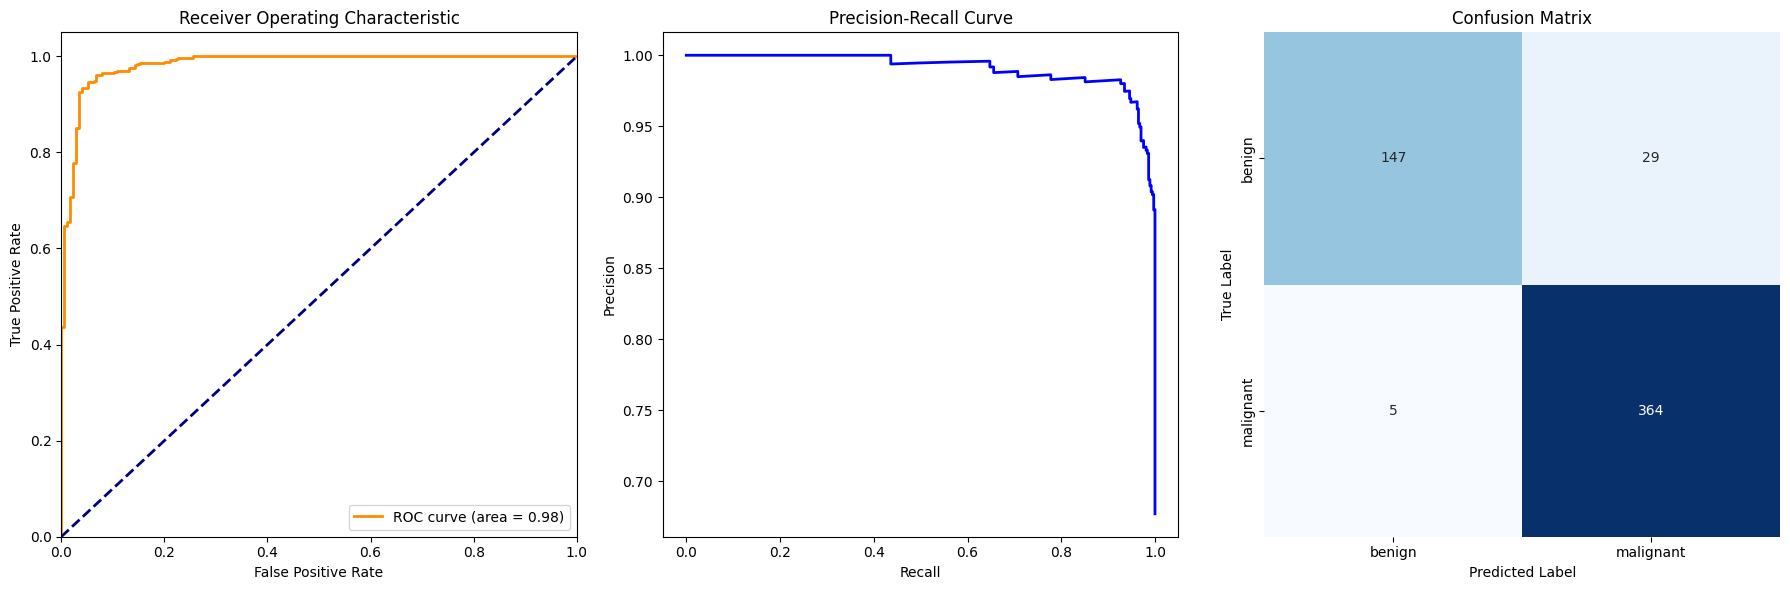

In [30]:
from tensorflow.keras.applications.xception import preprocess_input
input_size = (299, 299)
model = build_model_xception(num_classes, learning_rate=0.0001, freeze=False)
model.load_weights('/content/best_model_xception_finetuned.keras')
probability_xception = generate_output_probability(model, test_data_dir, batch_size=32, input_size=input_size)

from tensorflow.keras.applications.resnet_v2 import preprocess_input #ResNet50V2
input_size = (224, 224)  # ResNet50v2 expects 224x224 input size
model = build_model_resnet50v2(num_classes, learning_rate=0.00001, freeze=False)
model.load_weights('/content/best_model_resnet50v2_finetuned.keras')
probability_resnet50v2 = generate_output_probability(model, test_data_dir, batch_size=32, input_size=input_size)

from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input #InceptionResNetV2
input_size = (299, 299)  # InceptionResNetV2 expects 299x299 input size
model = build_model_inceptionresnetv2(num_classes, learning_rate=0.0001, freeze=False)
model.load_weights('/content/best_model_inceptionresnetv2_finetuned.keras')
probability_inceptionresnetv2 = generate_output_probability(model, test_data_dir, batch_size=32, input_size=input_size)

from tensorflow.keras.applications.densenet import preprocess_input #DenseNet201
input_size = (224, 224)  # DenseNet201 expects 224x224 input size
model = build_model_densenet201(num_classes, learning_rate=0.0001, freeze=False)
model.load_weights('/content/best_model_densenet201_finetuned.keras')
probability_densenet201 = generate_output_probability(model, test_data_dir, batch_size=32, input_size=input_size)

from tensorflow.keras.applications.efficientnet import preprocess_input #EfficientNetB4
input_size = (384, 380)  # EfficientNetB4 expects 384x380
model = build_model_efficientnetb4(num_classes, learning_rate=0.0001, freeze=False)
model.load_weights('/content/best_model_efficientnetb4_finetuned.keras')
probability_efficientnetb4 = generate_output_probability(model, test_data_dir, batch_size=32, input_size=input_size)

from tensorflow.keras.applications.efficientnet_v2 import preprocess_input #EfficientNetV2S
input_size = (384, 384)  # EfficientNetV2S expects 384x384
model = build_model_efficientnetv2s(num_classes, learning_rate=0.0001, freeze=False)
model.load_weights('/content/best_model_efficientnetv2s_finetuned.keras')
probability_efficientnetv2s = generate_output_probability(model, test_data_dir, batch_size=32, input_size=input_size)

# combine the probabilities
combined_probabilities = combine_output_probability(
    [probability_xception,
     probability_resnet50v2,
     probability_inceptionresnetv2,
     probability_densenet201,
     probability_efficientnetb4,
     probability_efficientnetv2s]
)

# evaluate the accuracies
accuracy = evaluate_accuracy(combined_probabilities, test_data_dir, batch_size=32, input_size=input_size)


In [31]:
import shutil
import glob

# Path to the directory containing the models
source_dir = '/content/'

# Destination directory on Google Drive
destination_dir = '/content/drive/MyDrive/'

# Find all files in source_dir that end with .keras
model_files = glob.glob(f'{source_dir}*.keras')

# Copy each model file to the destination directory
for file in model_files:
    shutil.copy(file, destination_dir)
    print(f"Copied {file} to {destination_dir}")

print(f"Copied {len(model_files)} model files to {destination_dir}")

Copied /content/best_model_efficientnetb4_finetuned.keras to /content/drive/MyDrive/
Copied /content/best_model_inceptionresnetv2.keras to /content/drive/MyDrive/
Copied /content/best_model_densenet201.keras to /content/drive/MyDrive/
Copied /content/best_model_resnet50v2_finetuned.keras to /content/drive/MyDrive/
Copied /content/best_model_efficientnetb4.keras to /content/drive/MyDrive/
Copied /content/best_model_inceptionresnetv2_finetuned.keras to /content/drive/MyDrive/
Copied /content/best_model_efficientnetv2s.keras to /content/drive/MyDrive/
Copied /content/best_model_efficientnetv2s_finetuned.keras to /content/drive/MyDrive/
Copied /content/best_model_xception_finetuned.keras to /content/drive/MyDrive/
Copied /content/best_model_densenet201_finetuned.keras to /content/drive/MyDrive/
Copied /content/best_model_xception.keras to /content/drive/MyDrive/
Copied /content/best_model_resnet50v2.keras to /content/drive/MyDrive/
Copied 12 model files to /content/drive/MyDrive/


In [32]:
import zipfile
import glob

# Path to the directory containing the models
model_dir = '/content/drive/MyDrive/'

# Output ZIP file name
zip_filename = '/content/drive/MyDrive/keras_models.zip'

# Find all files in model_dir that end with .keras
model_files = glob.glob(f'{model_dir}*.keras')

# Create a ZIP file
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for file in model_files:
        zipf.write(file, arcname=file.split('/')[-1])
        print(f"Added {file} to {zip_filename}")

print(f"All .keras files have been zipped into {zip_filename}")

Added /content/drive/MyDrive/best_model_efficientnetb4_finetuned.keras to /content/drive/MyDrive/keras_models.zip
Added /content/drive/MyDrive/best_model_inceptionresnetv2.keras to /content/drive/MyDrive/keras_models.zip
Added /content/drive/MyDrive/best_model_densenet201.keras to /content/drive/MyDrive/keras_models.zip
Added /content/drive/MyDrive/best_model_resnet50v2_finetuned.keras to /content/drive/MyDrive/keras_models.zip
Added /content/drive/MyDrive/best_model_efficientnetb4.keras to /content/drive/MyDrive/keras_models.zip
Added /content/drive/MyDrive/best_model_inceptionresnetv2_finetuned.keras to /content/drive/MyDrive/keras_models.zip
Added /content/drive/MyDrive/best_model_efficientnetv2s.keras to /content/drive/MyDrive/keras_models.zip
Added /content/drive/MyDrive/best_model_efficientnetv2s_finetuned.keras to /content/drive/MyDrive/keras_models.zip
Added /content/drive/MyDrive/best_model_xception_finetuned.keras to /content/drive/MyDrive/keras_models.zip
Added /content/driv